## **Food Delivery Time Prediction using Machine Learning**

In [ ]:
#Import essential library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Upload and read the dataset
url = "https://raw.githubusercontent.com/h20220841/Zomato/main/Food%20Delivery%20time%20predictions/food_delivery.csv"

# Try reading the CSV with 'latin1' encoding
df = pd.read_csv(url, index_col=0, encoding='latin1')

df.head()


,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
ID,,,,,,,,,,
4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [ ]:
df.tail()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
ID,,,,,,,,,,
7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26
5FB2,RANCHIRES09DEL02,23,4.9,23.351058,85.325731,23.431058,85.405731,Snack,scooter,36


### 1.) **Data Preprocessing**

In [ ]:
#Shape of the dataset
df.shape

(45593, 10)

Findings:

* data has 45593 rows and 10 columns

In [ ]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Type_of_order', 'Type_of_vehicle', 'Time_taken(min)'],
      dtype='object')

In [ ]:
#Find any duplicate present in the dataset
df.duplicated().sum()

12

Findings:

* There are 12 duplicate rows are present in the data set. so we have to remove them from the dataset for further analysis.

In [ ]:
#Remove the duplicate columns
df_no_duplicates = df.drop_duplicates()

df_no_duplicates.duplicated().sum()

0

In [ ]:
#Copy the no_duplicate data
data = df_no_duplicates.copy()
data.shape

(45581, 10)

In [ ]:
#Is ther any null value present in the data?
data.isnull().sum()

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

Findings:

* There is no any null value is present in the dataset

In [ ]:
#Find out information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45581 entries, 4607 to 5FB2
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           45581 non-null  object 
 1   Delivery_person_Age          45581 non-null  int64  
 2   Delivery_person_Ratings      45581 non-null  float64
 3   Restaurant_latitude          45581 non-null  float64
 4   Restaurant_longitude         45581 non-null  float64
 5   Delivery_location_latitude   45581 non-null  float64
 6   Delivery_location_longitude  45581 non-null  float64
 7   Type_of_order                45581 non-null  object 
 8   Type_of_vehicle              45581 non-null  object 
 9   Time_taken(min)              45581 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 4.8+ MB


In [ ]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45581.000000,45581.000000,45581.000000,45581.000000,45581.000000,45581.000000,45581.000000
mean,29.544328,4.632371,17.017959,70.229442,17.465521,70.843961,26.295101
std,5.696827,0.327743,8.185563,22.886309,7.335381,21.121261,9.383887
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.551440,75.897429,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [ ]:
#Unique value in the data set
data.nunique()

Delivery_person_ID             1320
Delivery_person_Age              22
Delivery_person_Ratings          28
Restaurant_latitude             657
Restaurant_longitude            518
Delivery_location_latitude     4373
Delivery_location_longitude    4373
Type_of_order                     4
Type_of_vehicle                   4
Time_taken(min)                  45
dtype: int64

In [ ]:
#Check different data type data set
object_columns = data.select_dtypes(include='object').columns
print("object columns:")
print(object_columns)
print()
print("**********************************************************************************")
print()

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:")
print(numerical_columns)

object columns:
Index(['Delivery_person_ID', 'Type_of_order', 'Type_of_vehicle'], dtype='object')

**********************************************************************************

Numerical columns:
Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_taken(min)'],
      dtype='object')


### Object Columns:

**Type of Order**

In [ ]:
#Deep dive into object type data set
data['Type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [ ]:
data['Type_of_order'].value_counts()

Snack      11529
Meal       11457
Drinks     11319
Buffet     11276
Name: Type_of_order, dtype: int64

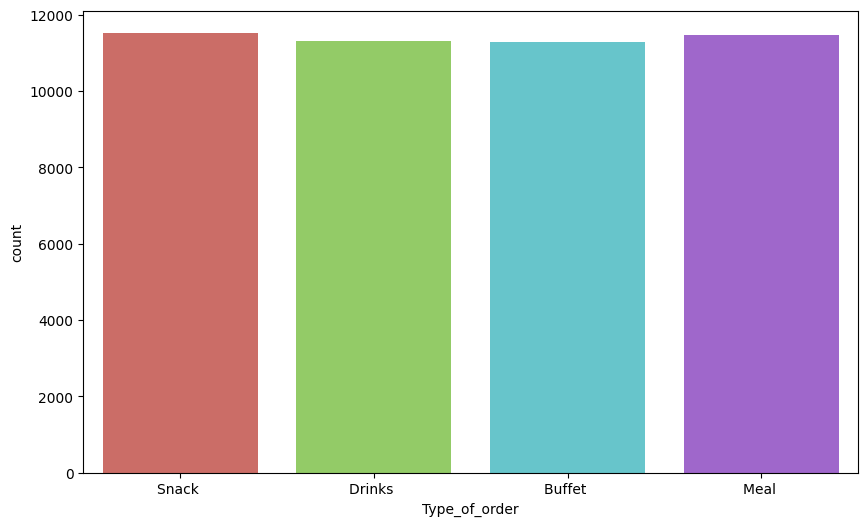

In [ ]:
#Draw the graph for better visualization
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Type_of_order'], palette='hls')
plt.xticks(rotation=0)
plt.show()

Findings:

* From the above graph we can say that the heighest **type of order** is done for the **Snack** followed by **Drinks**

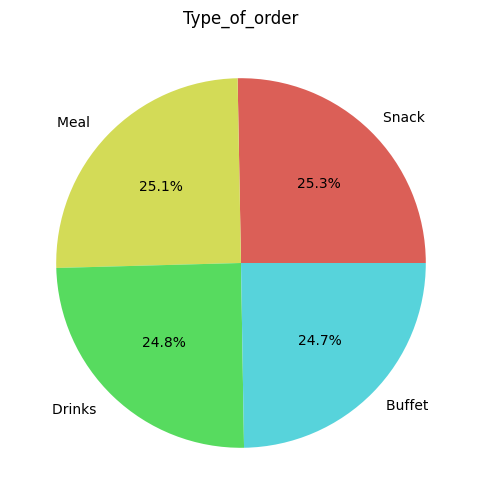

In [ ]:
#To see the contribution of different type of order
plt.figure(figsize=(15, 6))
counts = data['Type_of_order'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Type_of_order')
plt.show()

**Type of Vehicle**

In [ ]:
data['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [ ]:
#Type of vehicle counts
data['Type_of_vehicle'].value_counts()

motorcycle           26424
scooter              15275
electric_scooter      3814
bicycle                 68
Name: Type_of_vehicle, dtype: int64

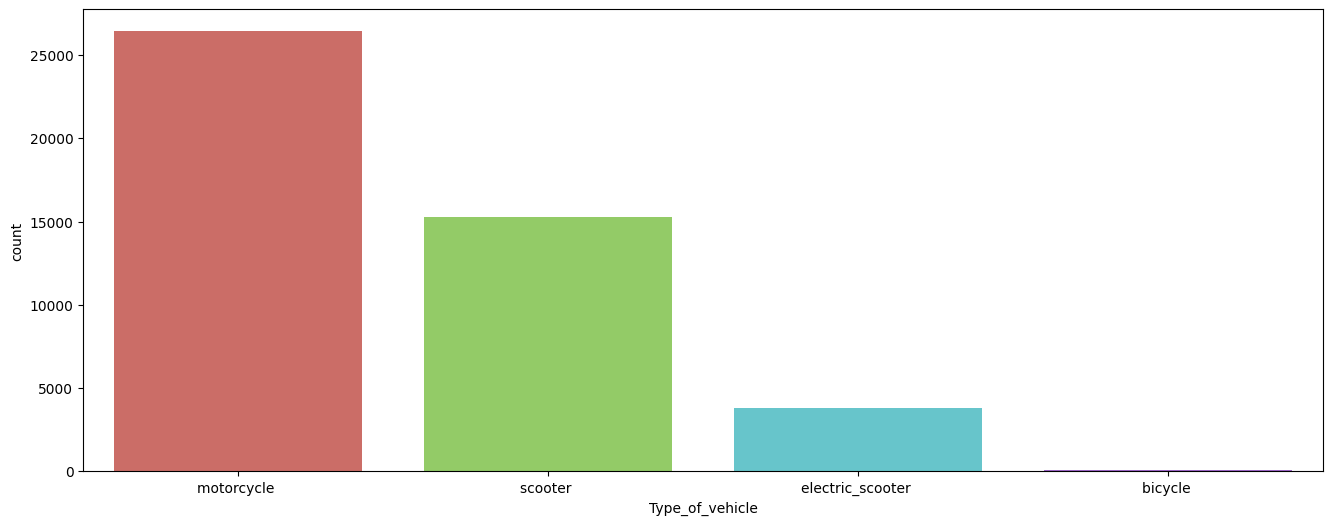

In [ ]:
#Compare on the graph for better visualization
plt.figure(figsize=(16, 6))
sns.countplot(x=data['Type_of_vehicle'], palette='hls')
plt.xticks(rotation = 0)
plt.show()

Findings:

* Motorcycle vehicle is used more for the delivering the food followed by scooter and electric scooter

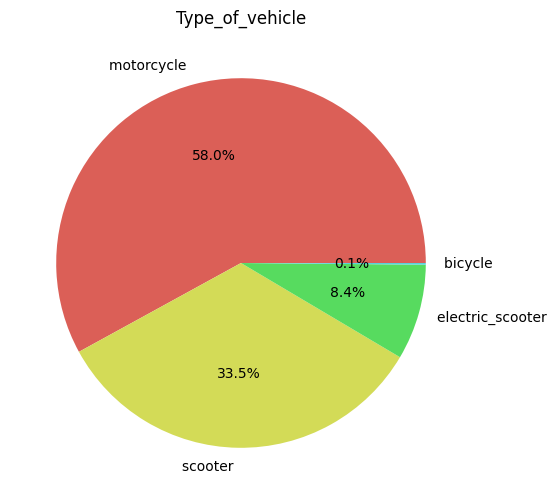

In [ ]:
#Plot on pie chart of type of vehicle is used
plt.figure(figsize=(15, 6))
counts = df['Type_of_vehicle'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Type_of_vehicle')
plt.show()

### Numerical Columns:

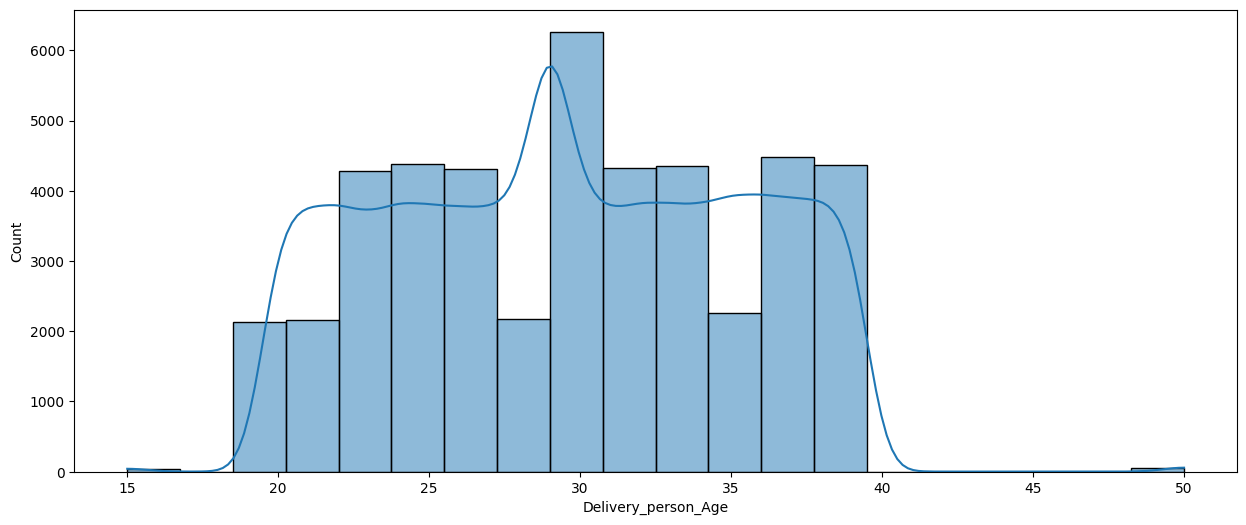

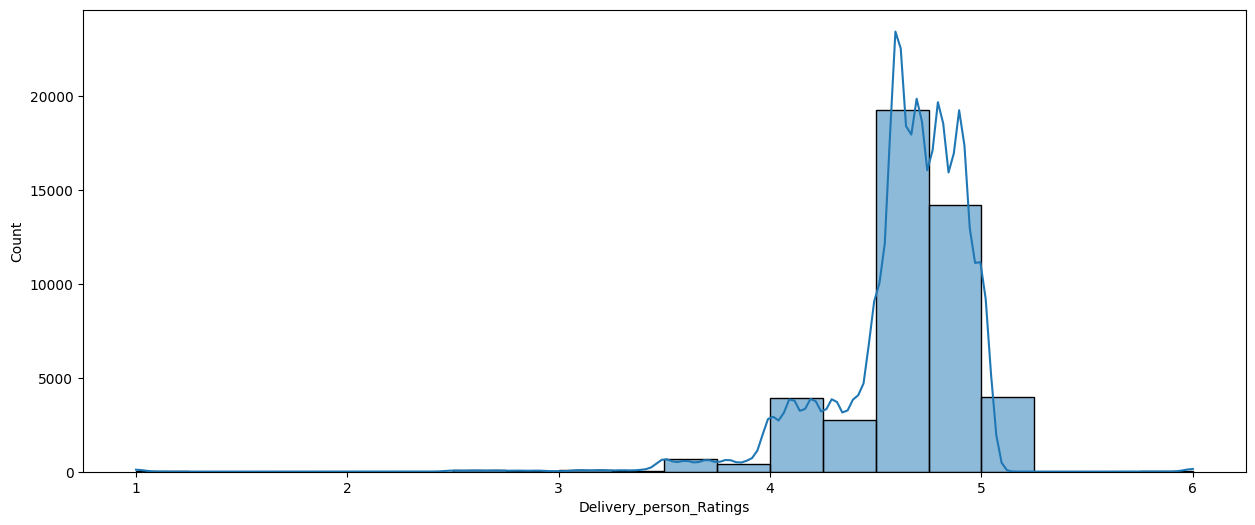

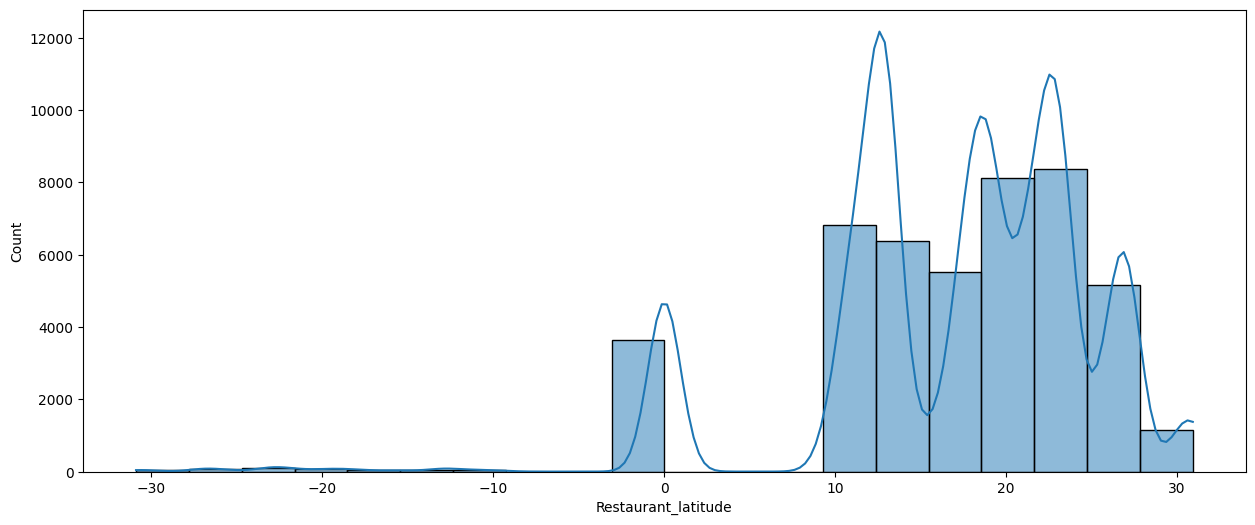

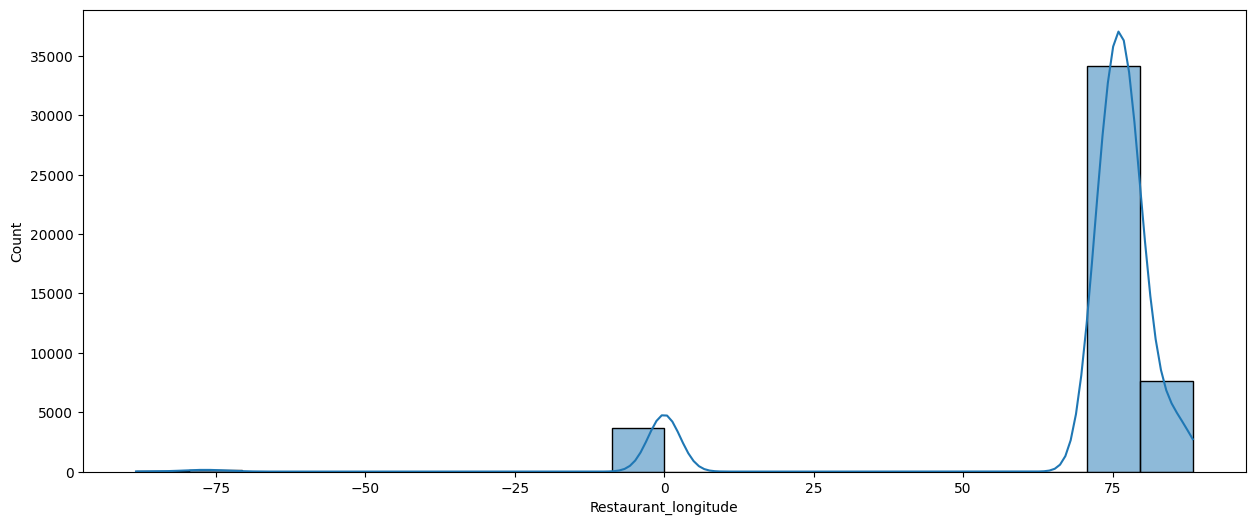

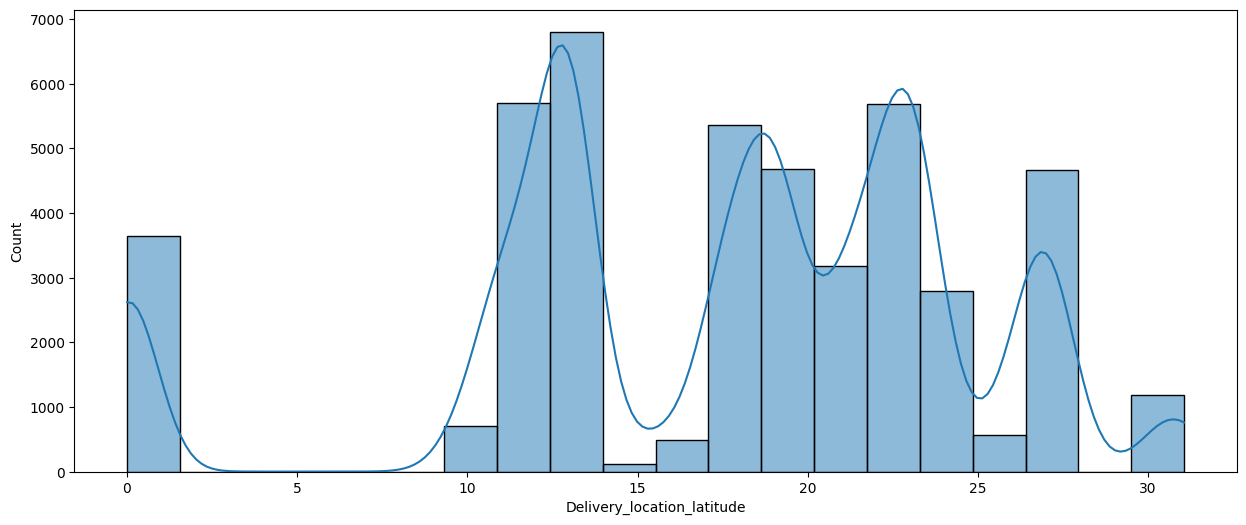

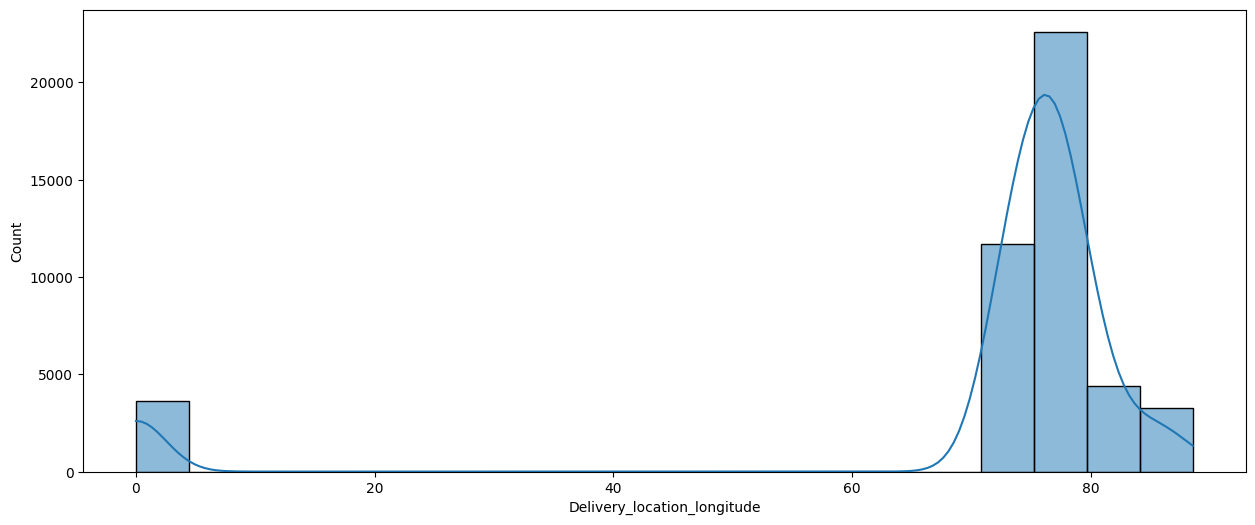

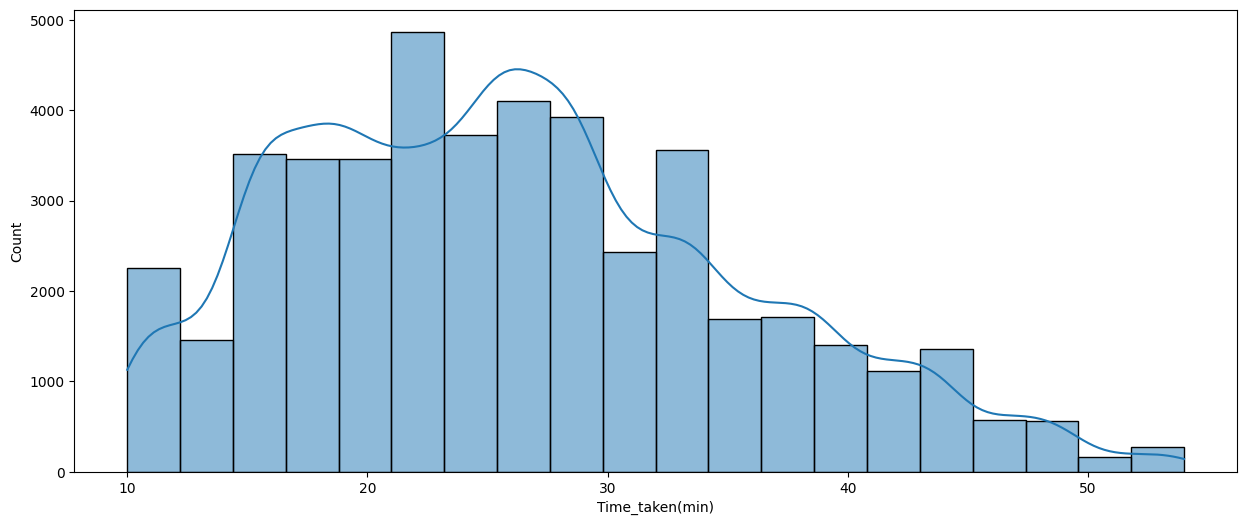

In [ ]:
#Draw histogram of all data set of numerical data
for i in numerical_columns:
  plt.figure(figsize=(15, 6))
  sns.histplot(data[i], kde=True, bins=20, palette='hls')
  plt.xticks(rotation=0)
  plt.show()

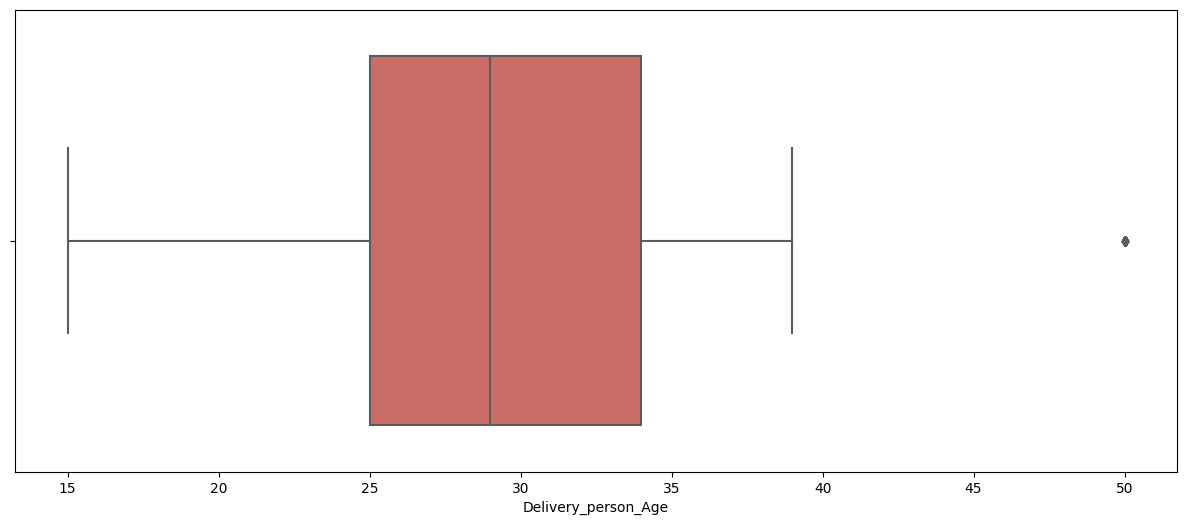

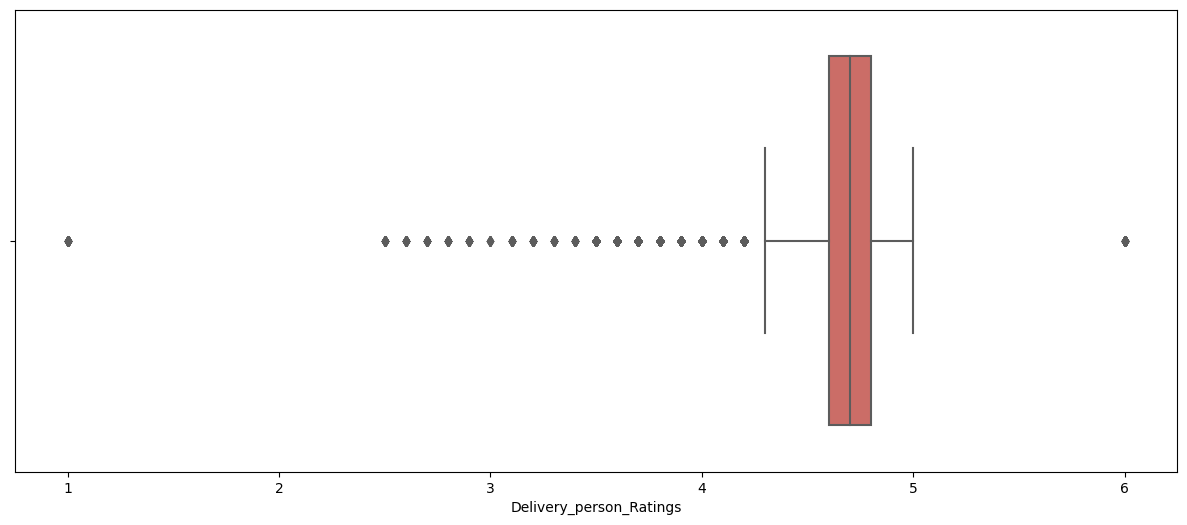

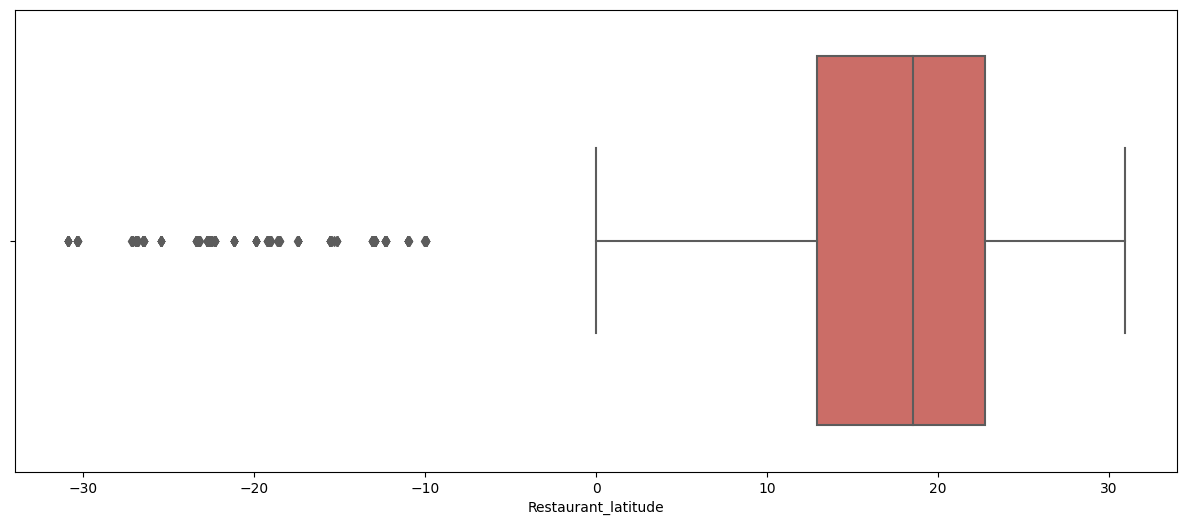

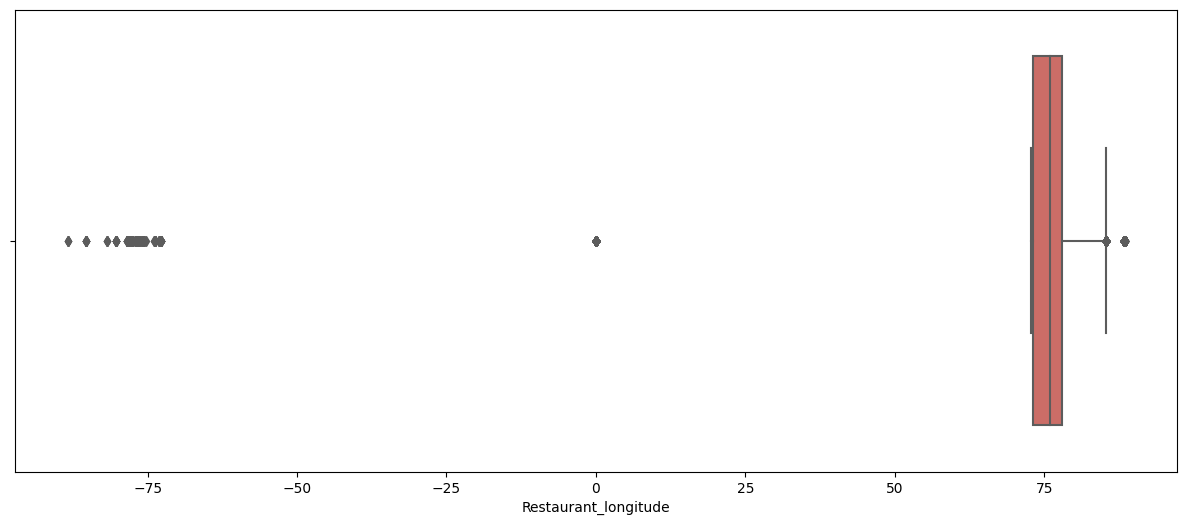

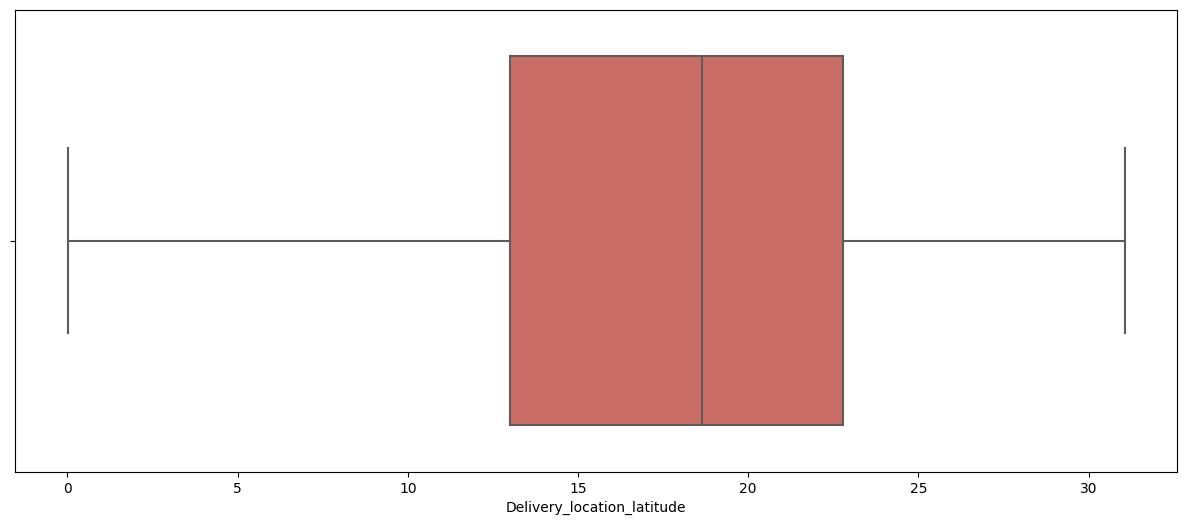

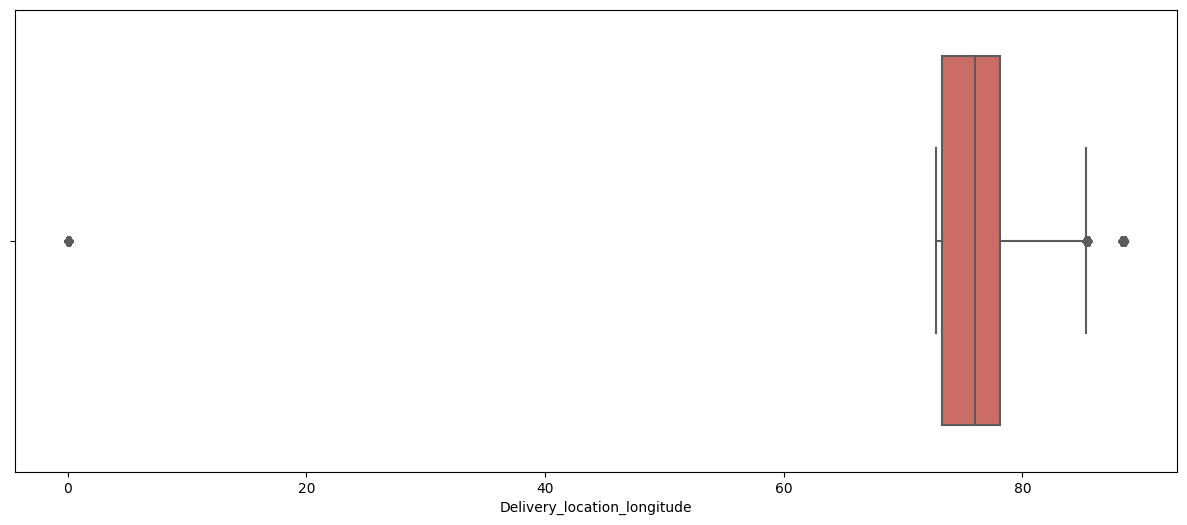

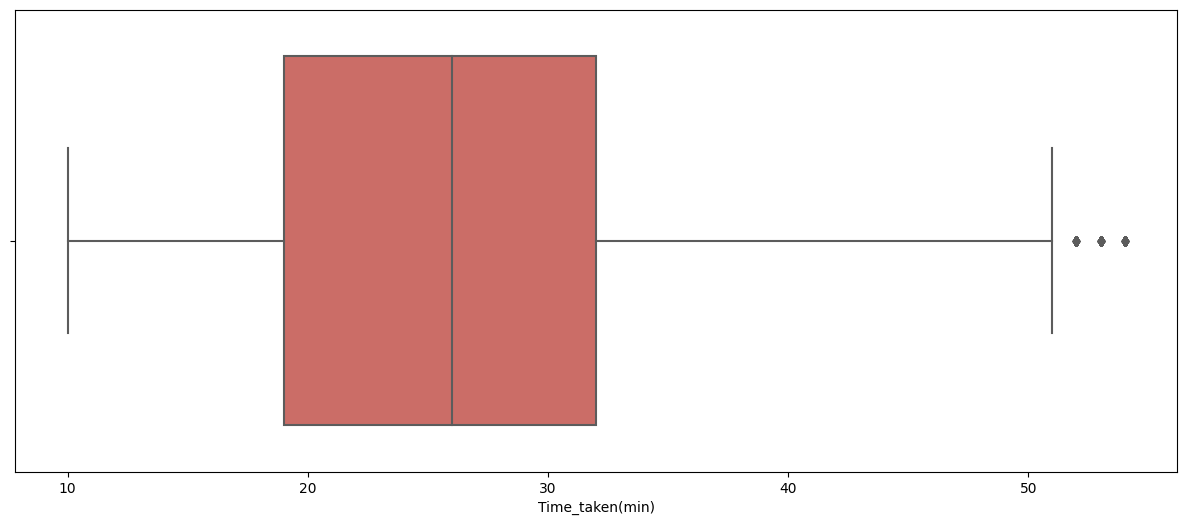

In [ ]:
#Draw Boxplot of all data set of numerical data
for i in numerical_columns:
  plt.figure(figsize=(15, 6))
  sns.boxplot(x=data[i],  palette='hls')
  plt.xticks(rotation=0)
  plt.show()

Findings:

* From the boxplot of Delivery person age, the minimum age is 15 and maximum age is 50 and median is 29.

* Delivering minimum rating is 1 and maximum is 6 and median is around 4.8

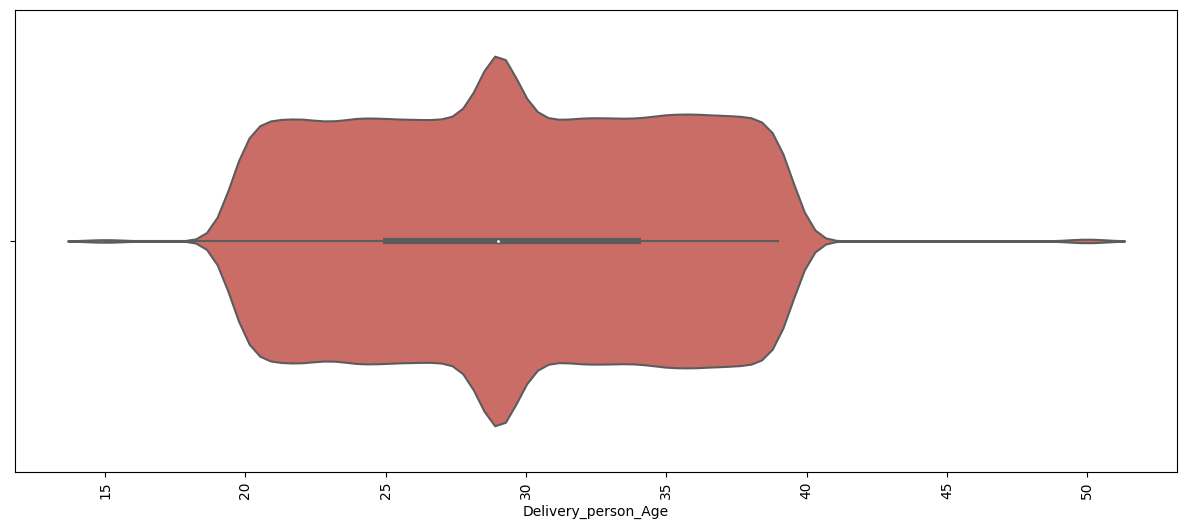

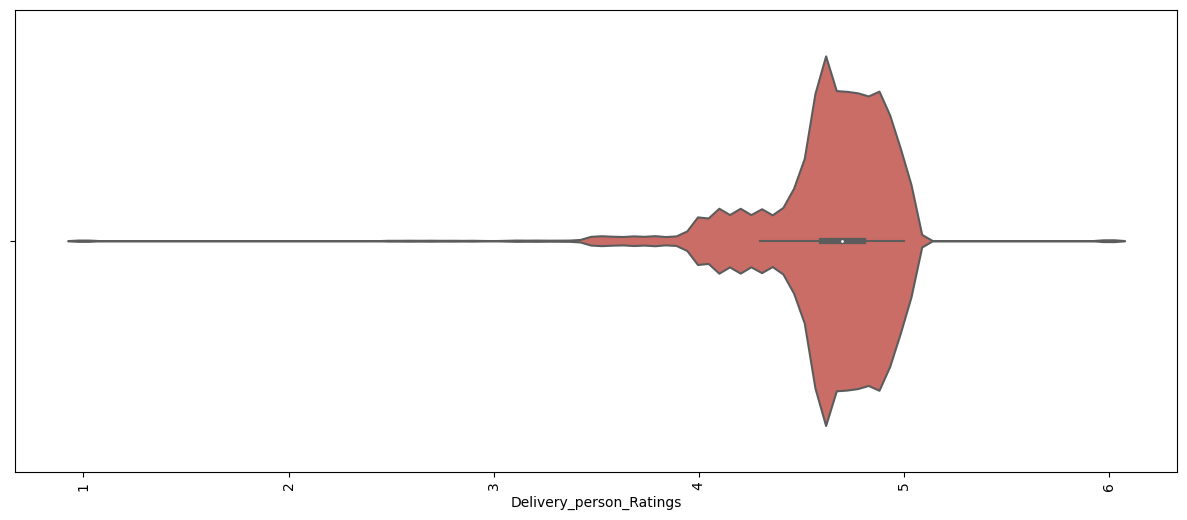

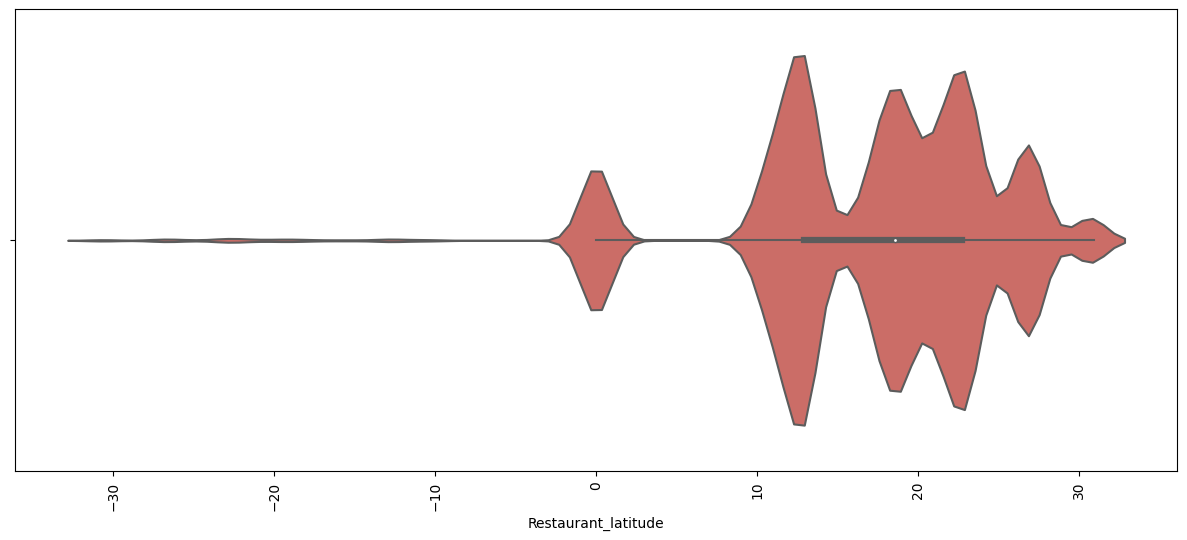

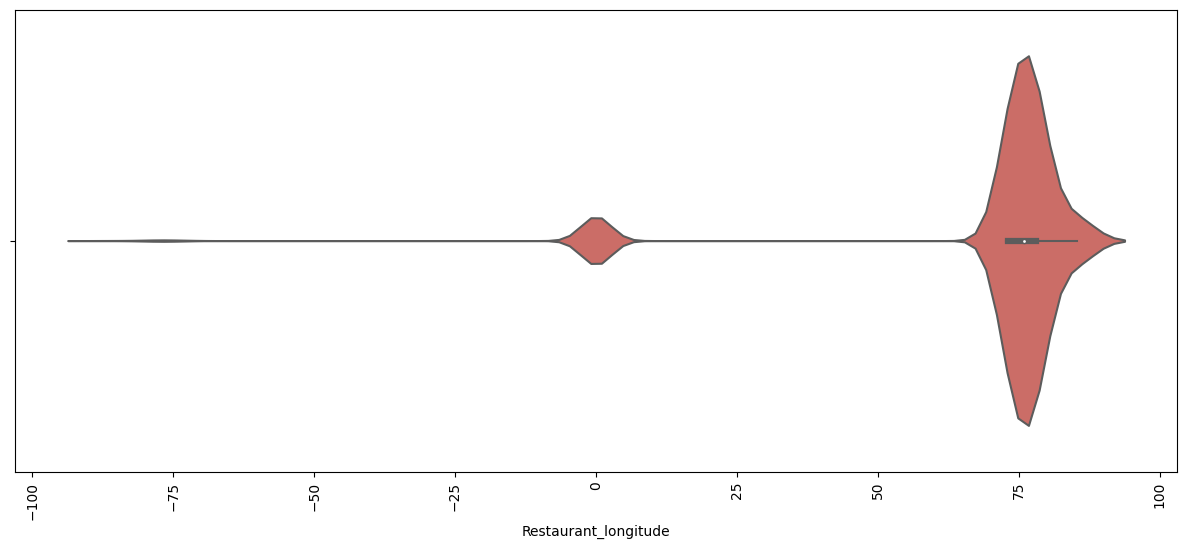

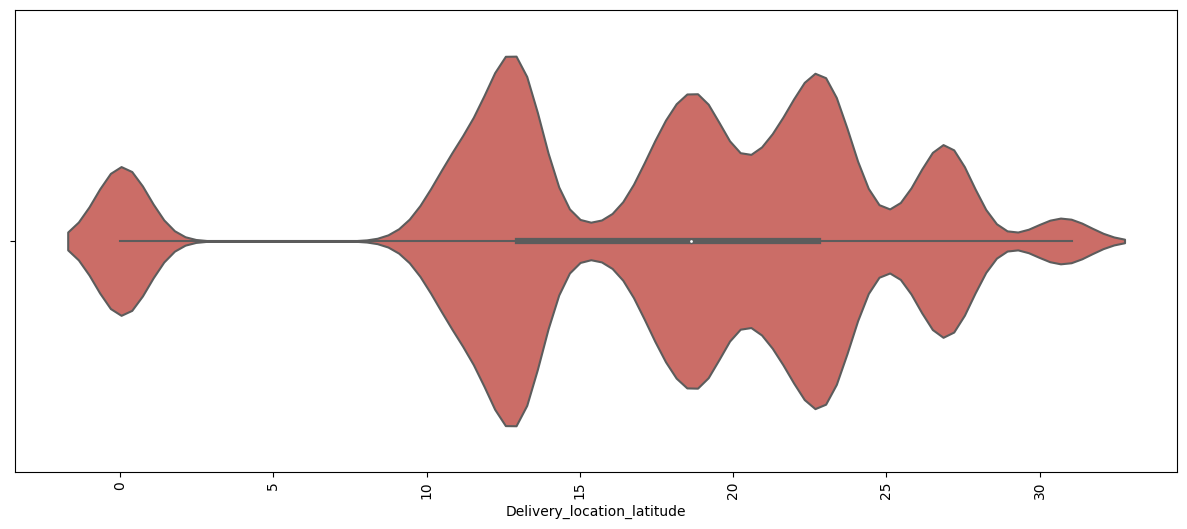

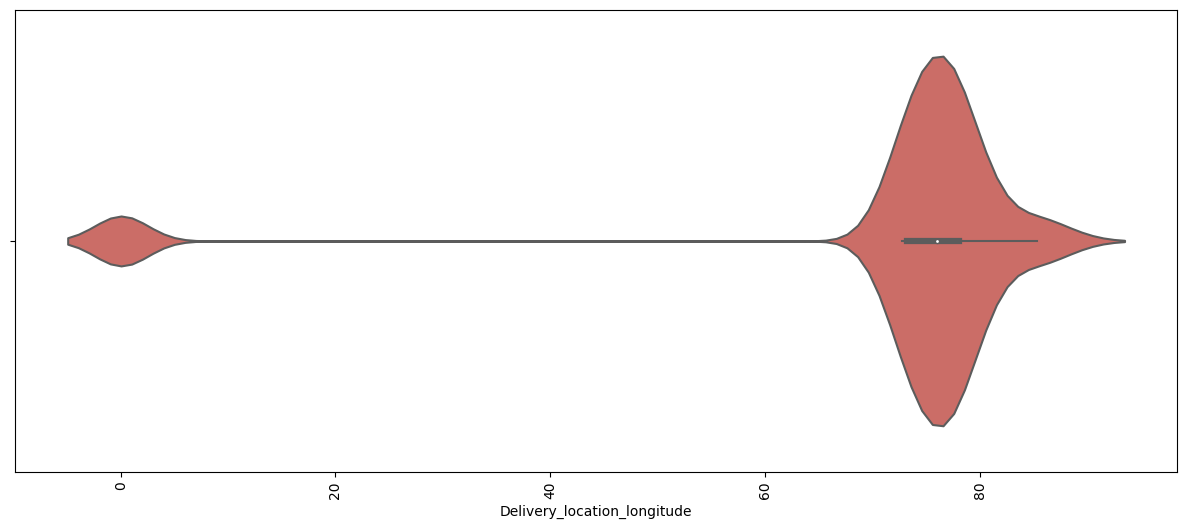

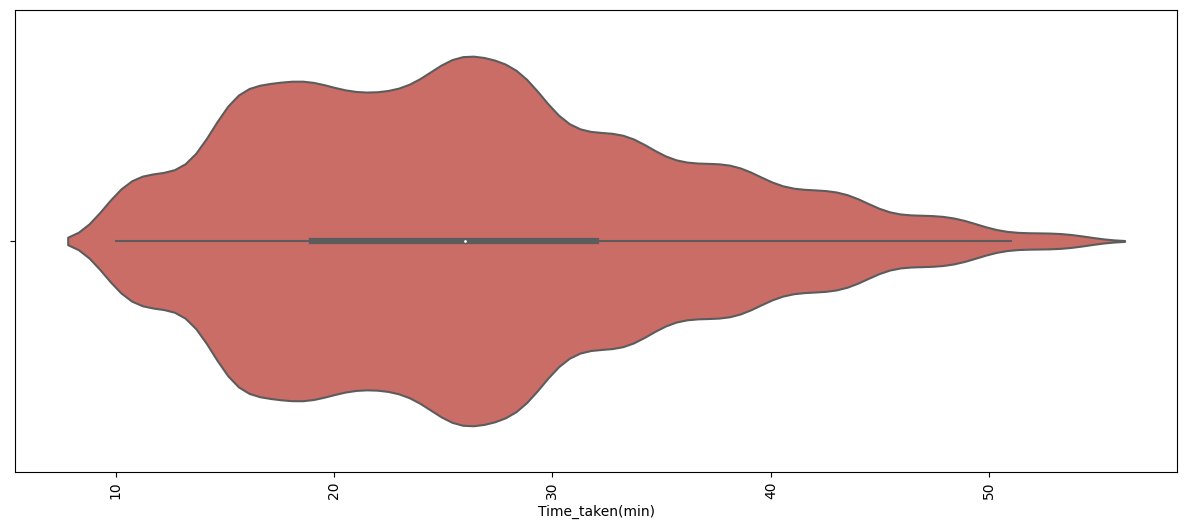

In [ ]:
#Draw histogram of all data set of numerical data
for i in numerical_columns:
  plt.figure(figsize=(15, 6))
  sns.violinplot(x=data[i], palette='hls')
  plt.xticks(rotation=90)
  plt.show()

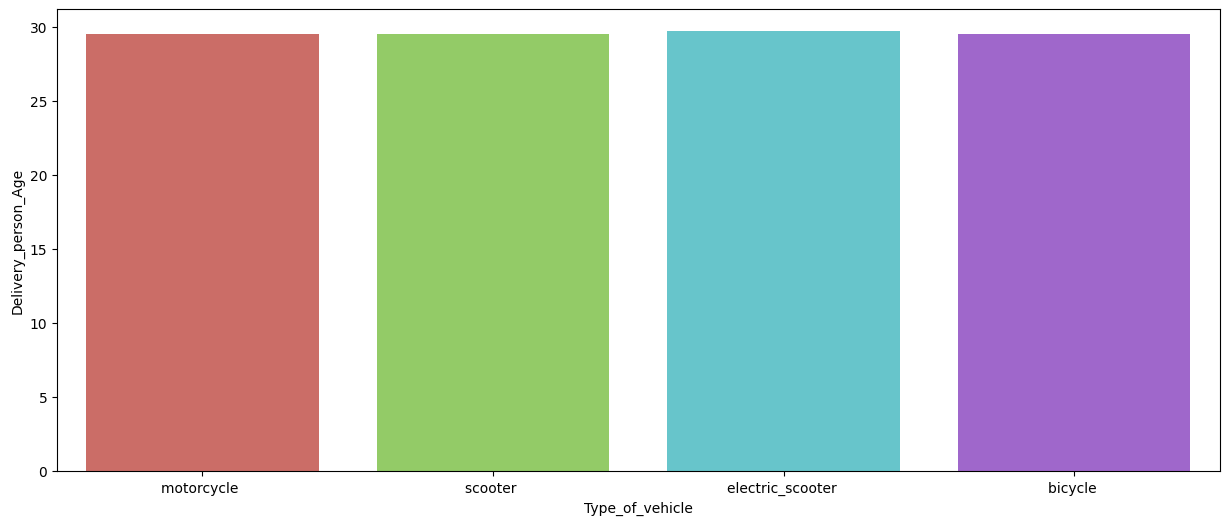

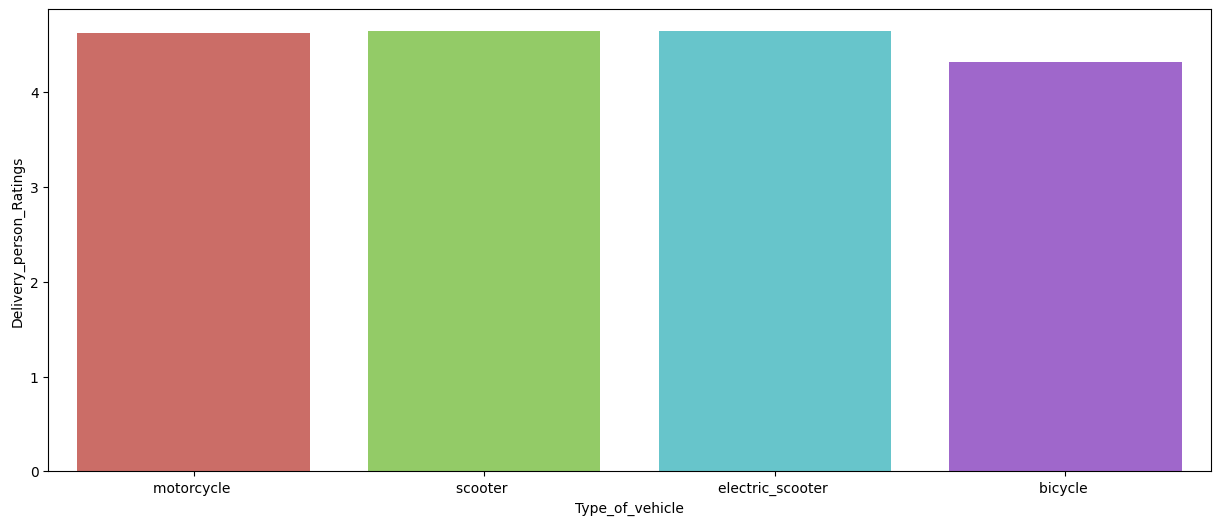

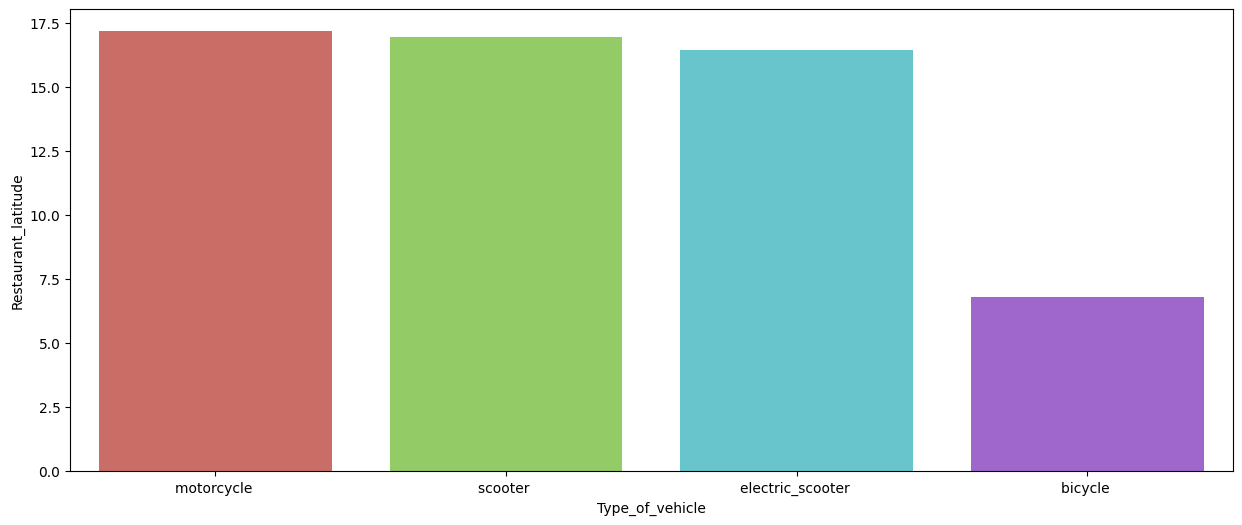

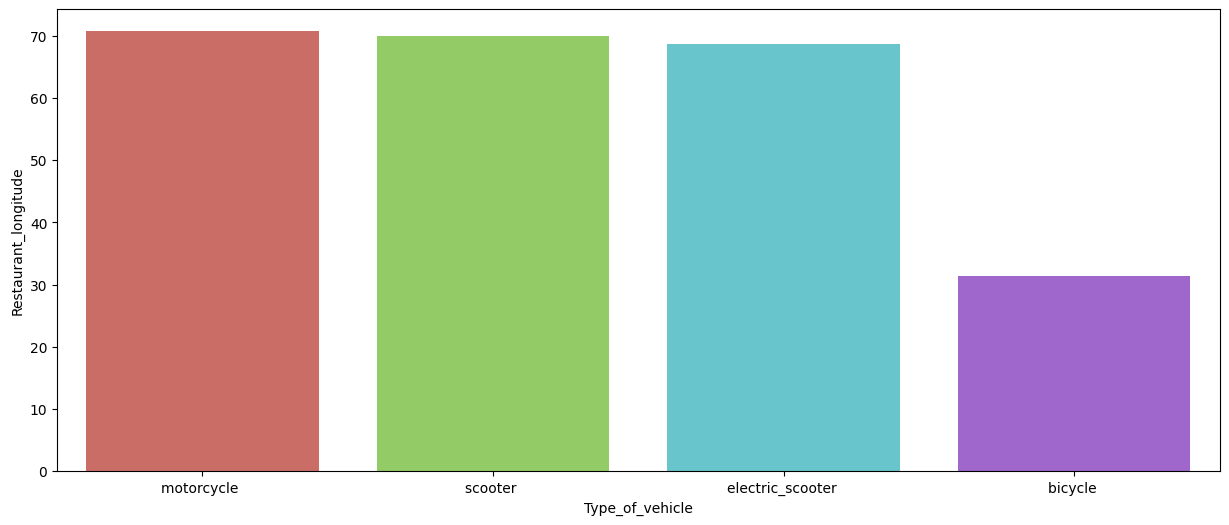

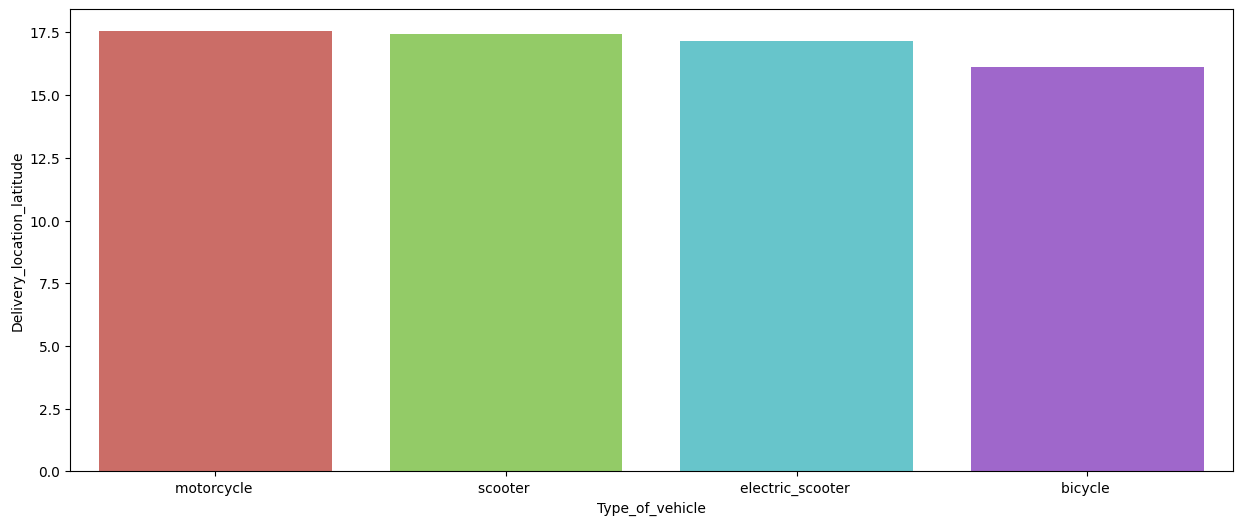

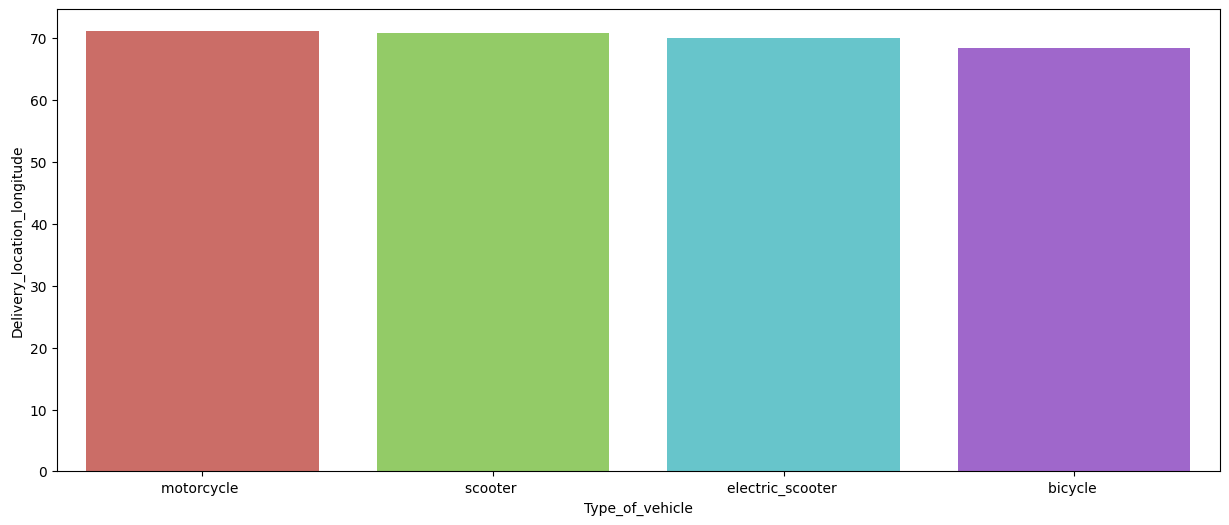

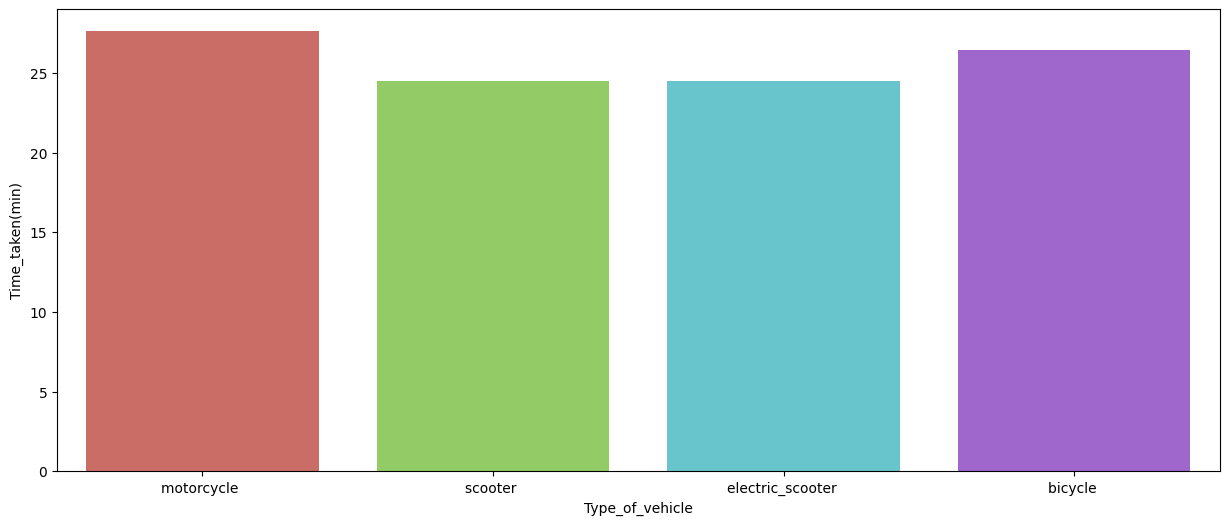

In [ ]:
#To see the effect of type of vehicle during the food delivery
for i in numerical_columns:
  plt.figure(figsize=(15, 6))
  sns.barplot(x = data['Type_of_vehicle'], y = data[i], ci = None, palette= 'hls')
  plt.show()

Findings:

* From the above we can see that the there is some effect of the rating  with bicycle vehicle. it may be due to the late delivering the food (as you can see the delivery time graph)

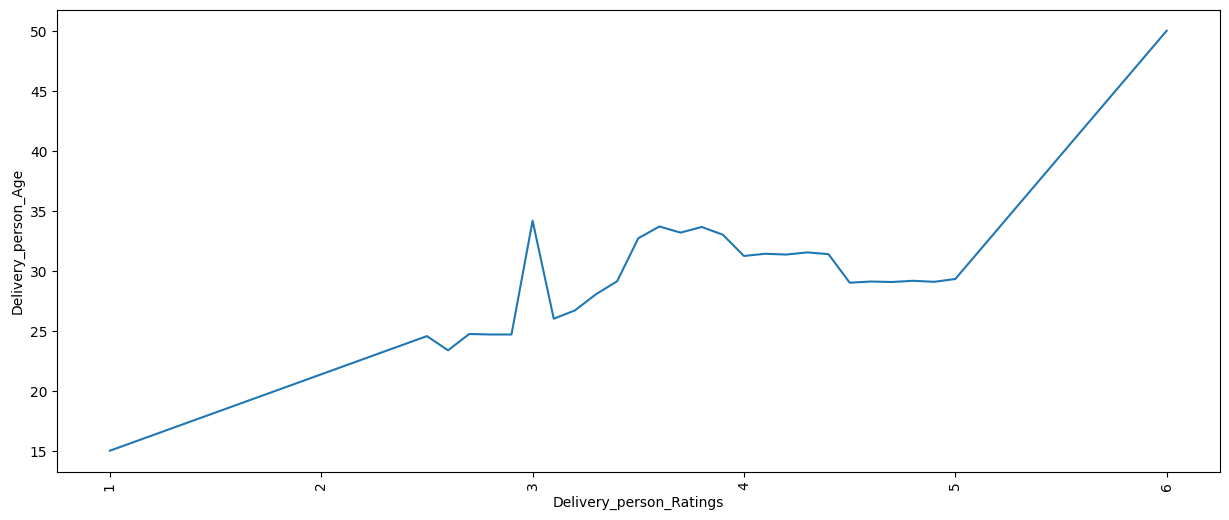

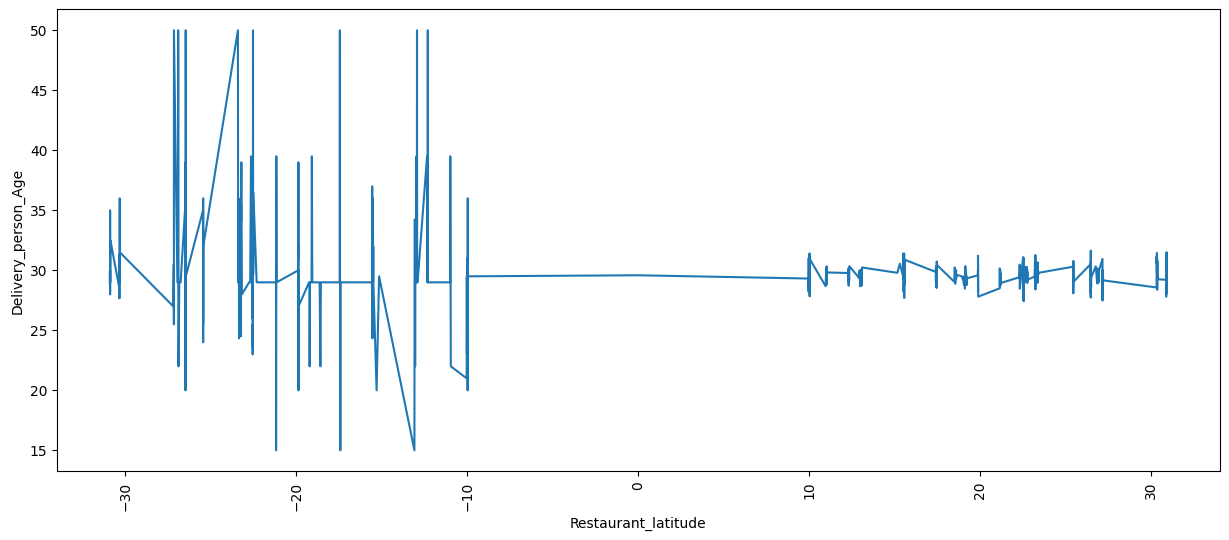

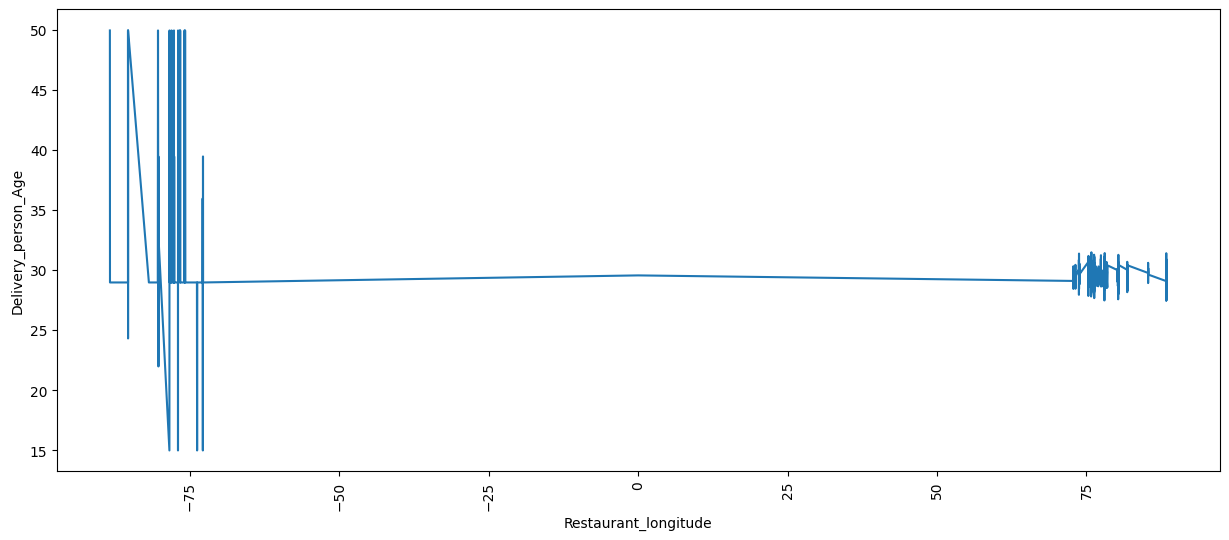

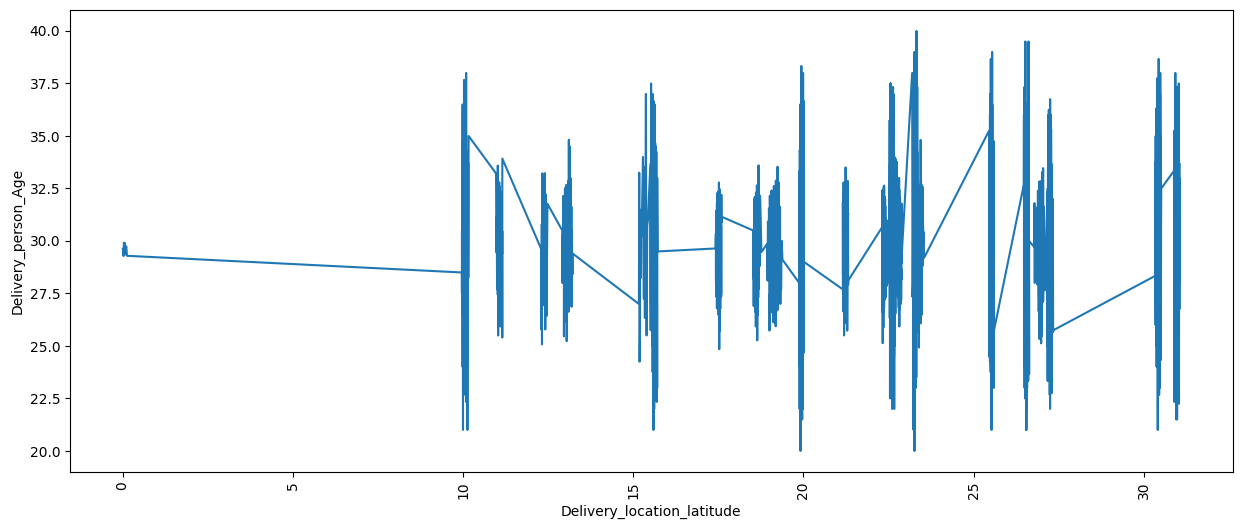

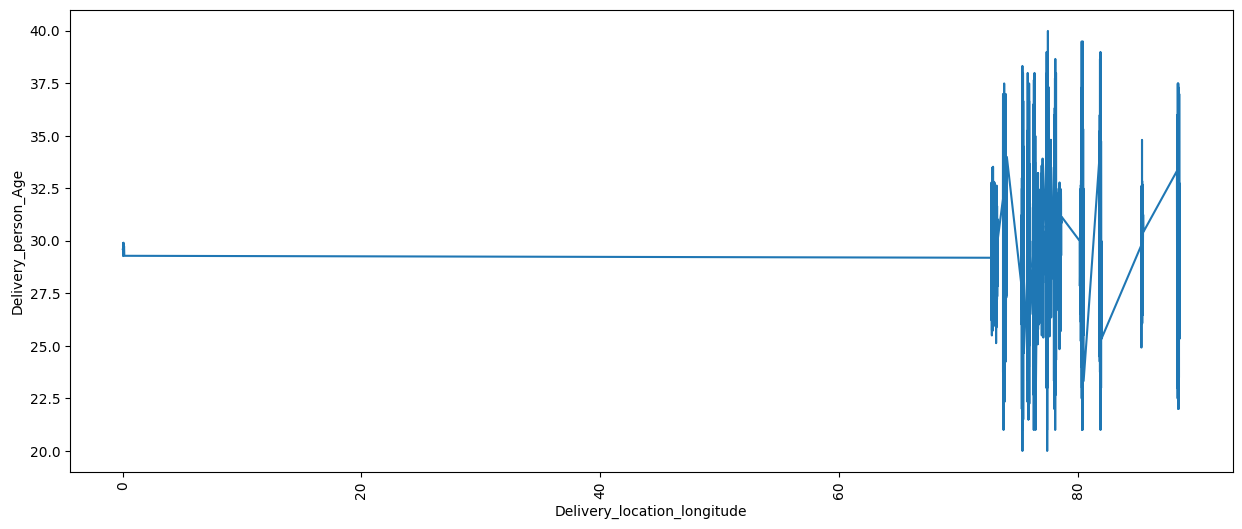

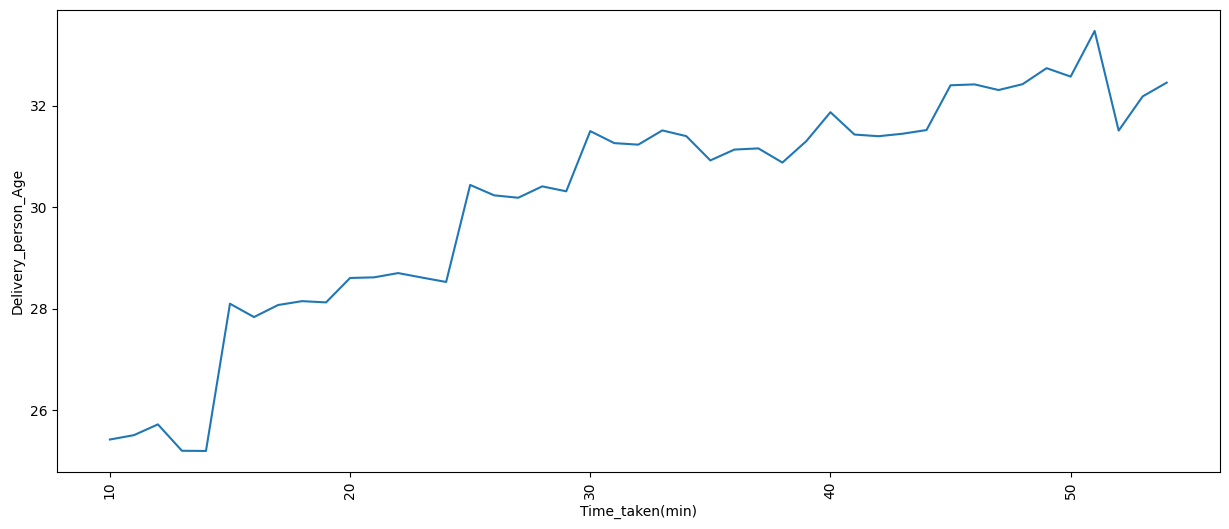

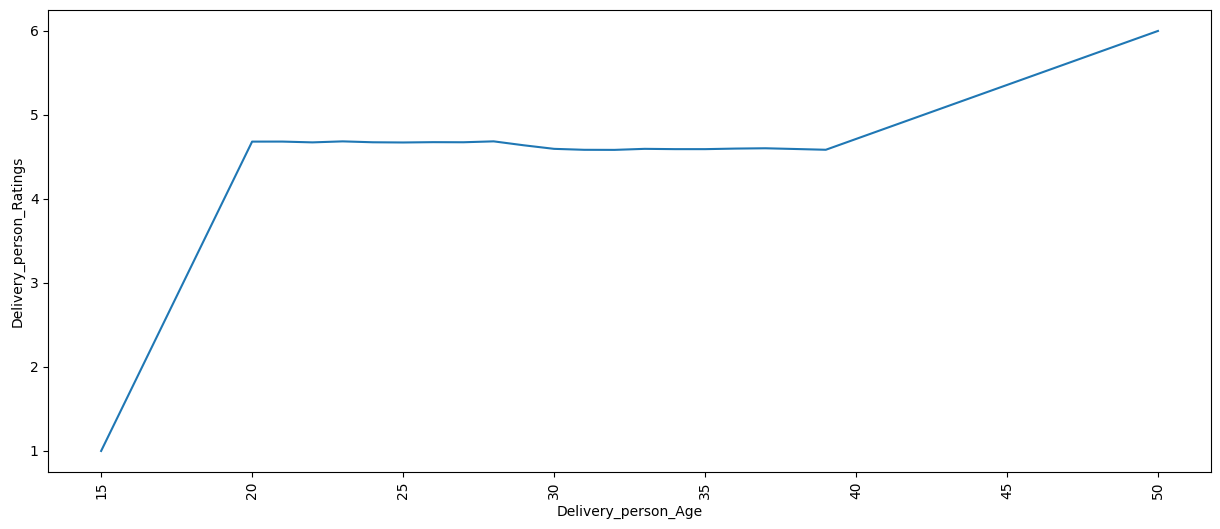

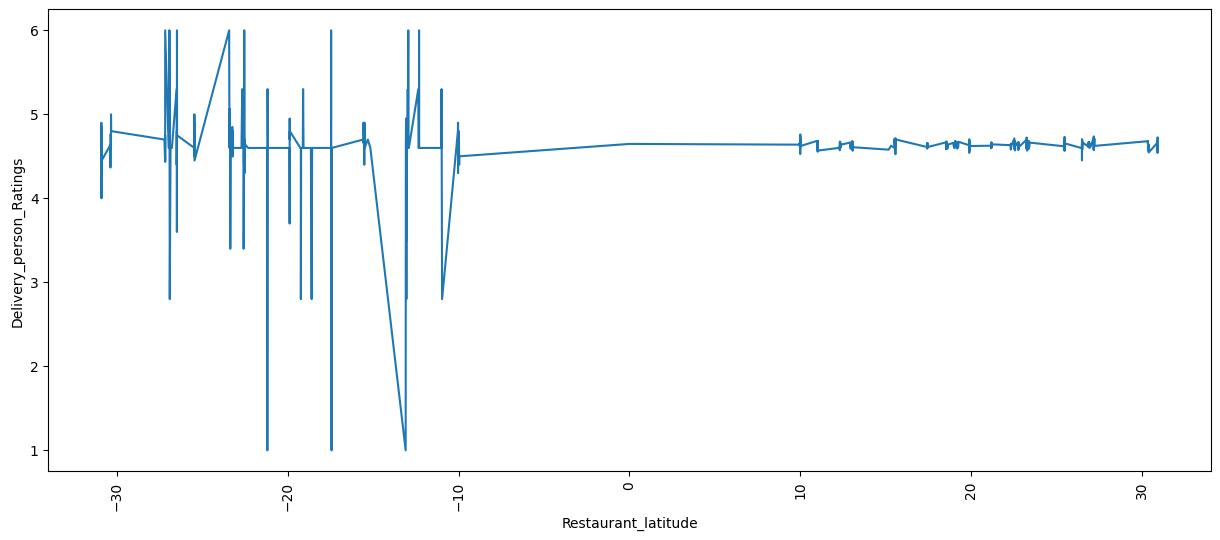

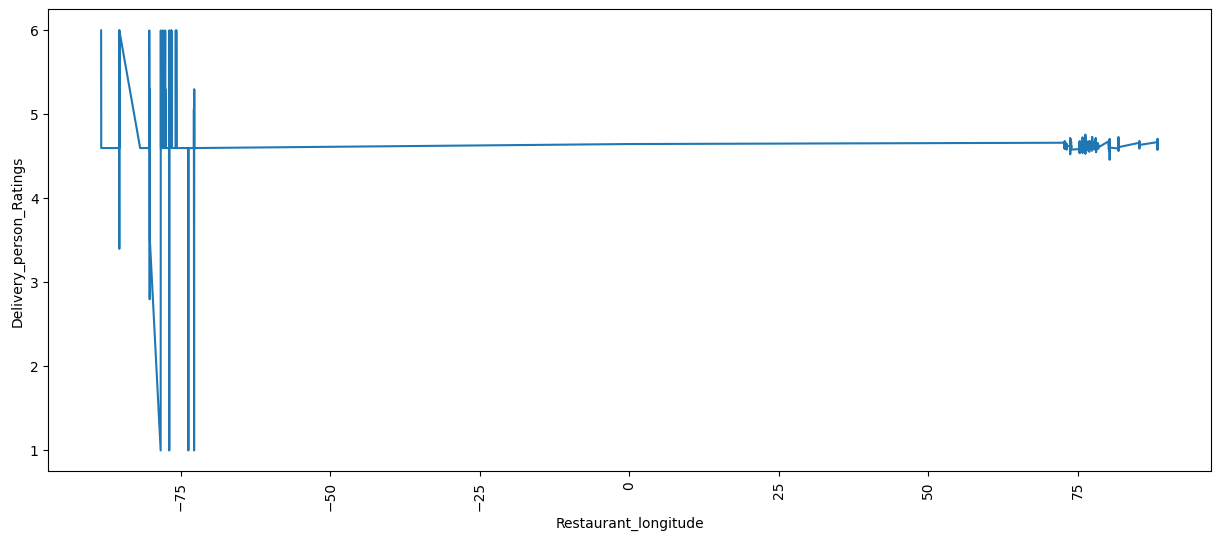

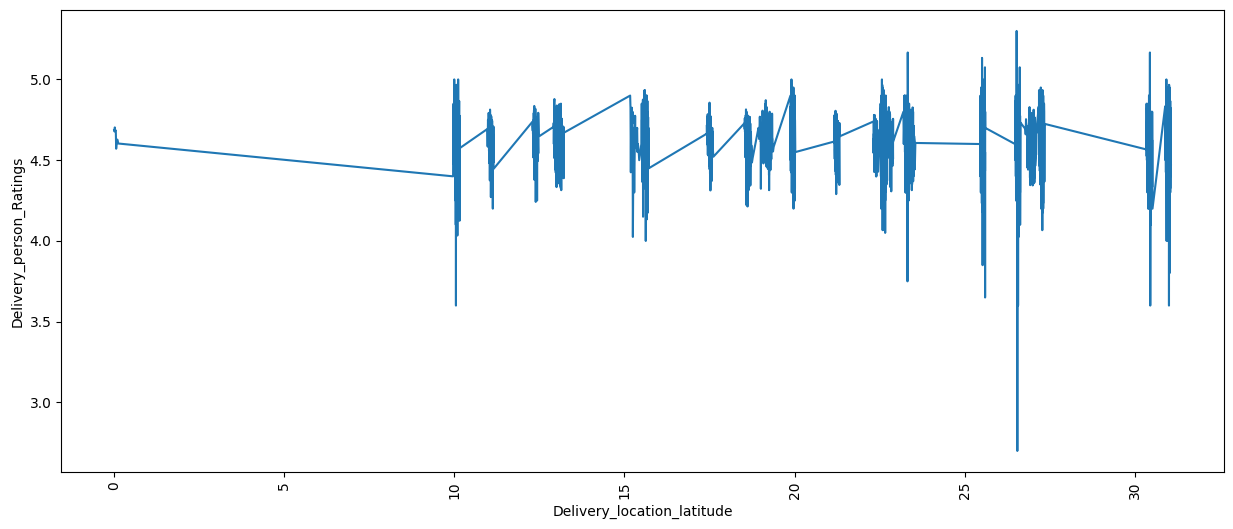

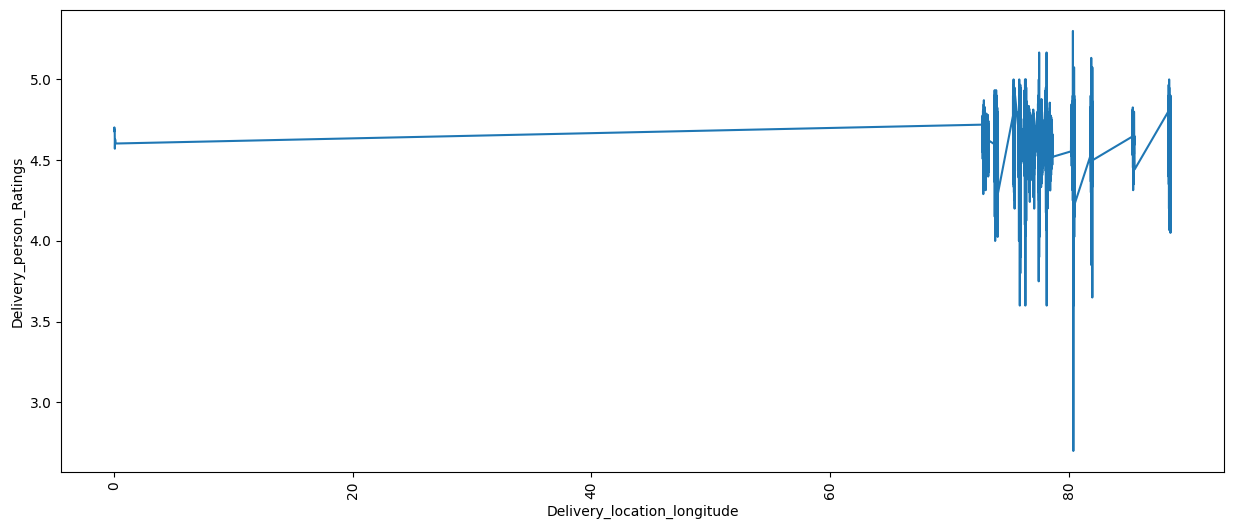

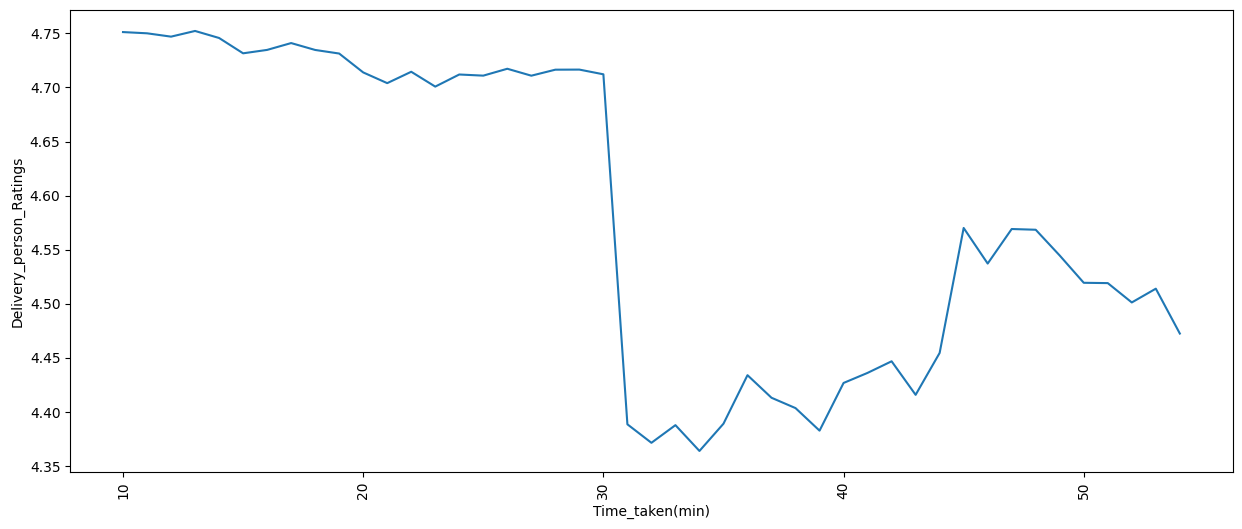

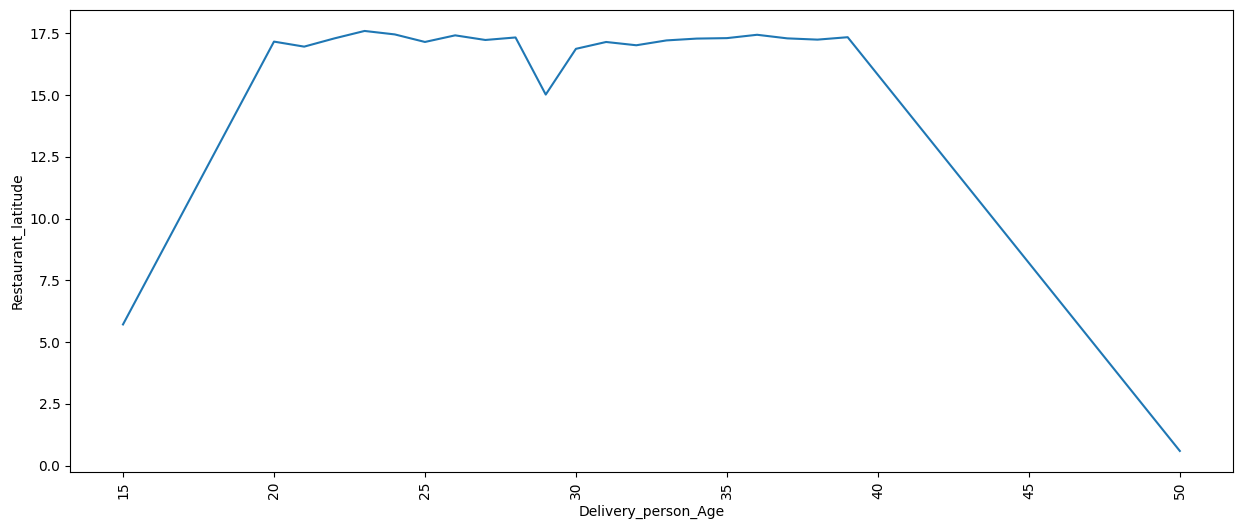

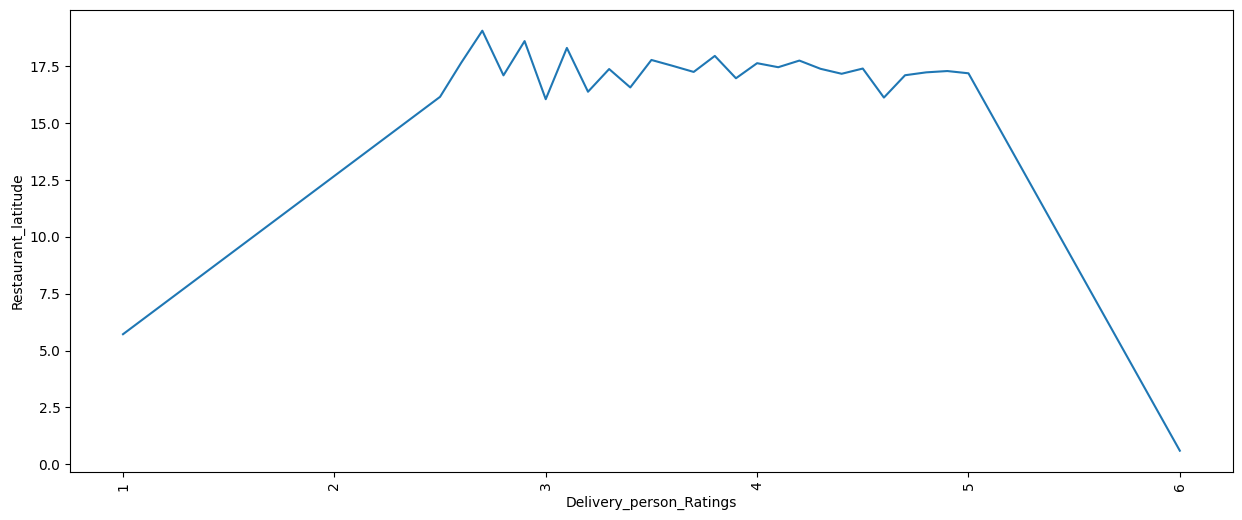

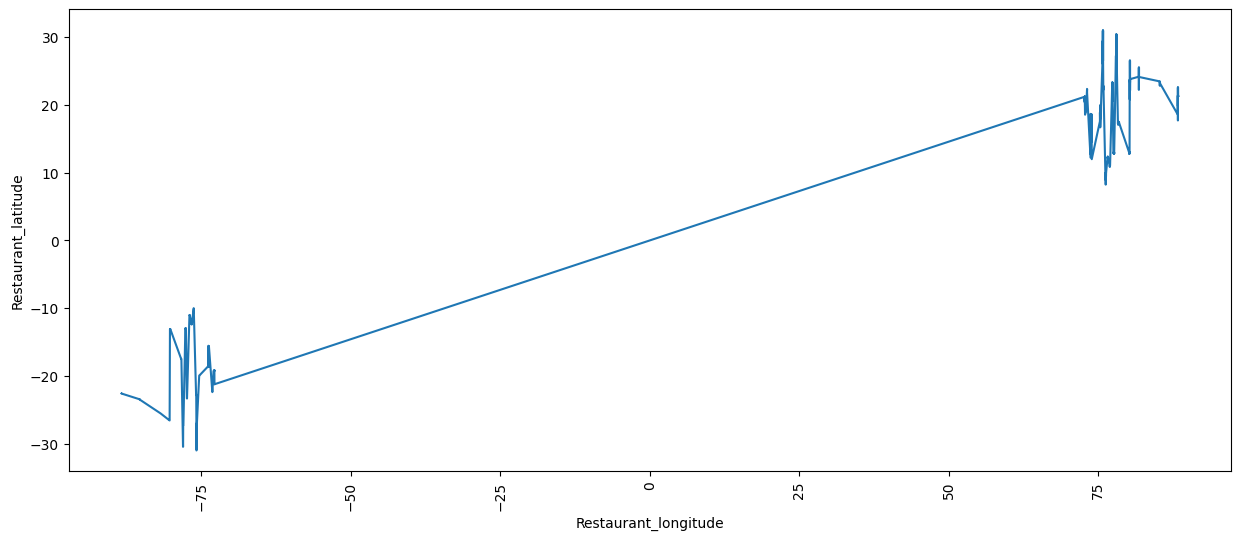

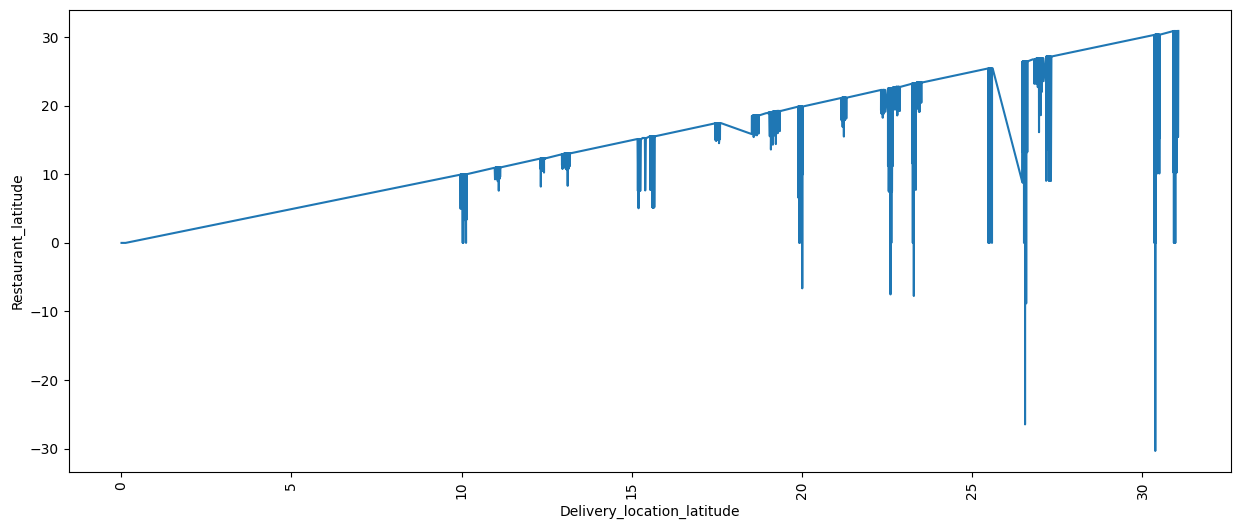

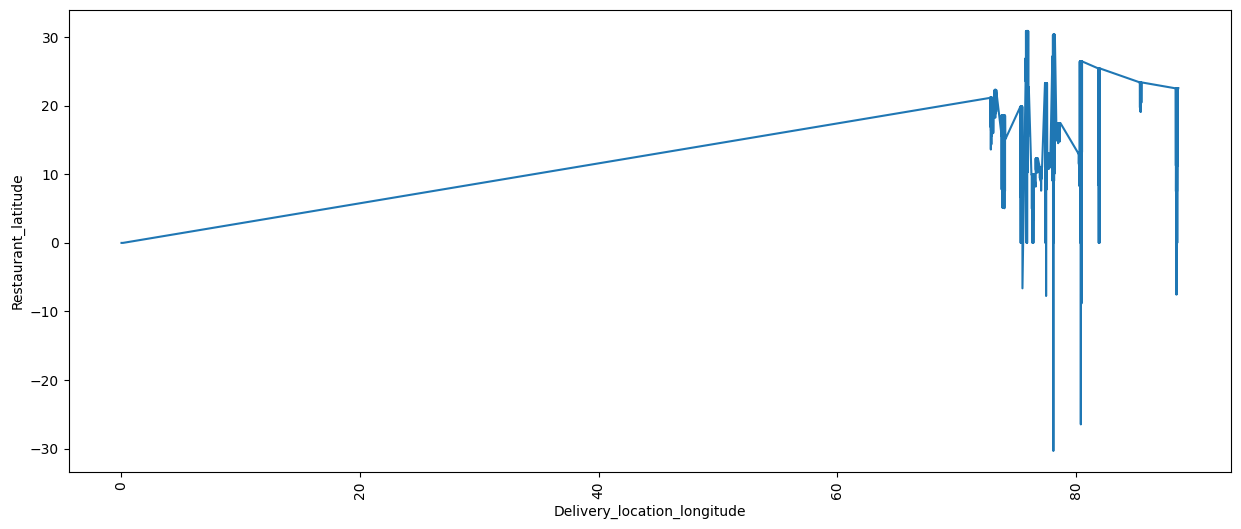

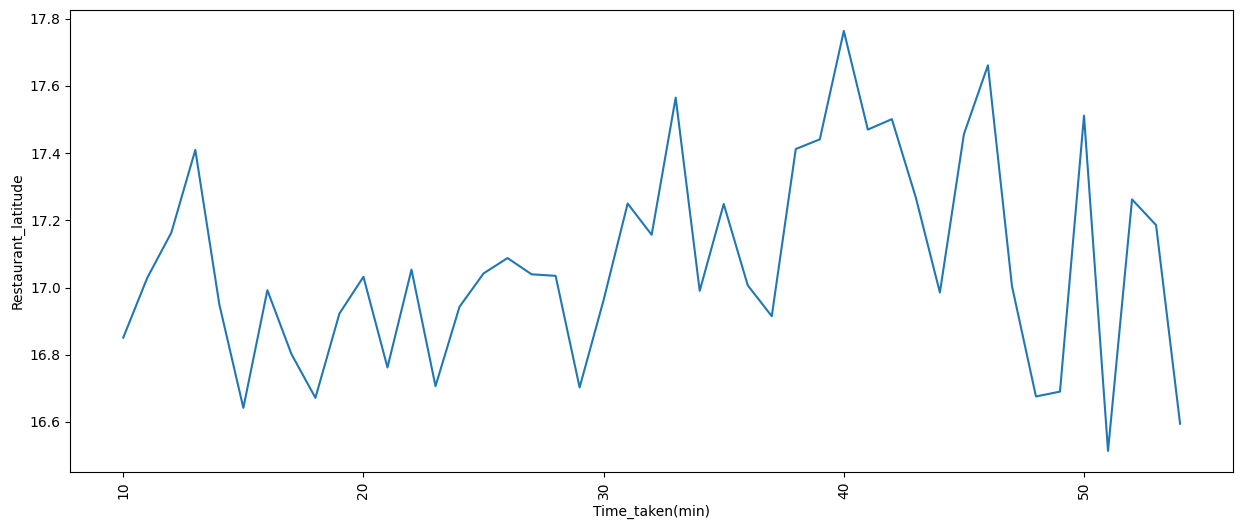

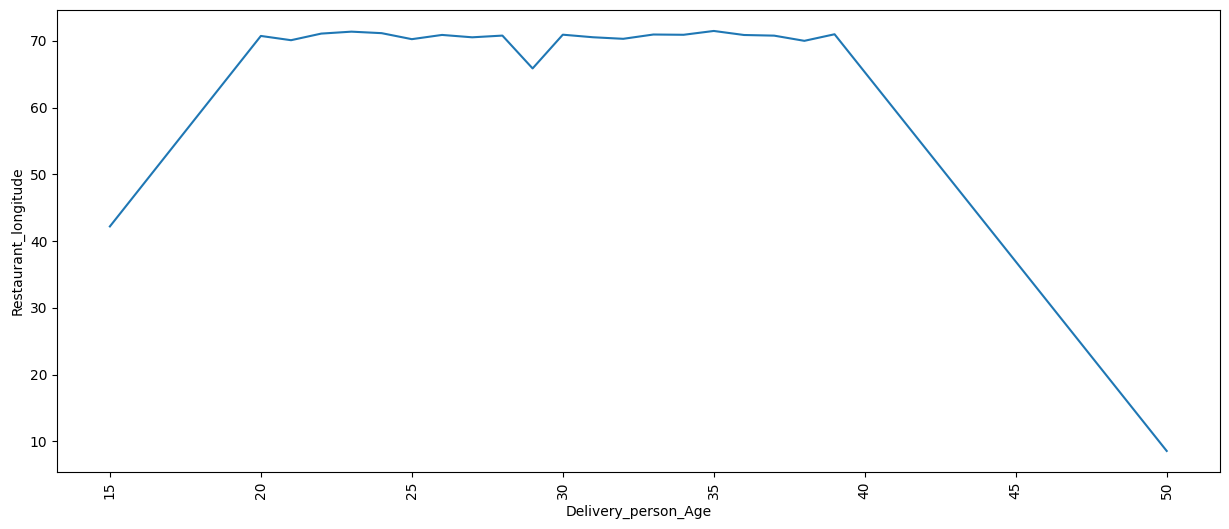

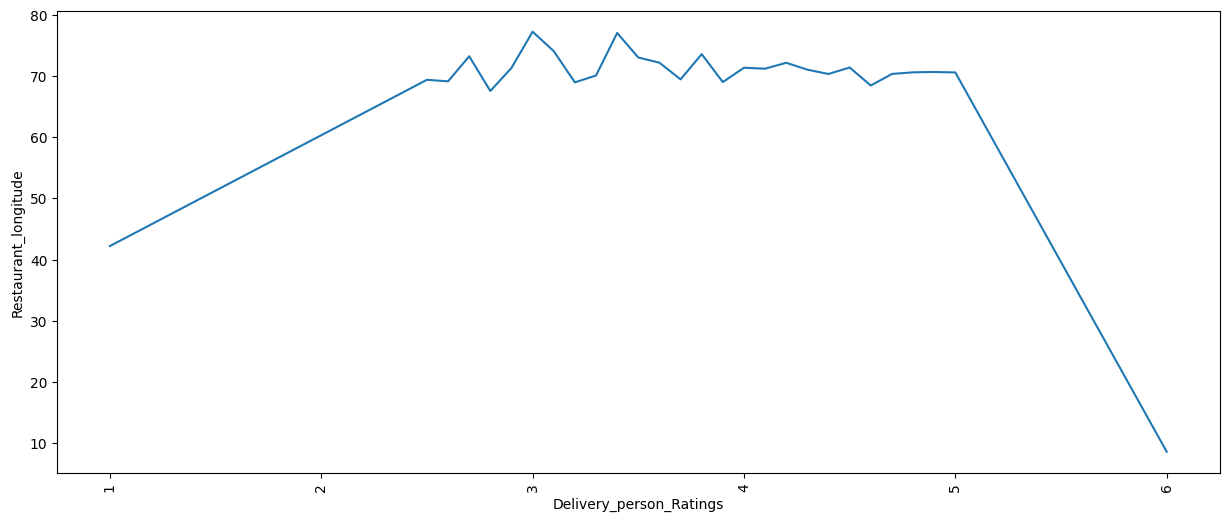

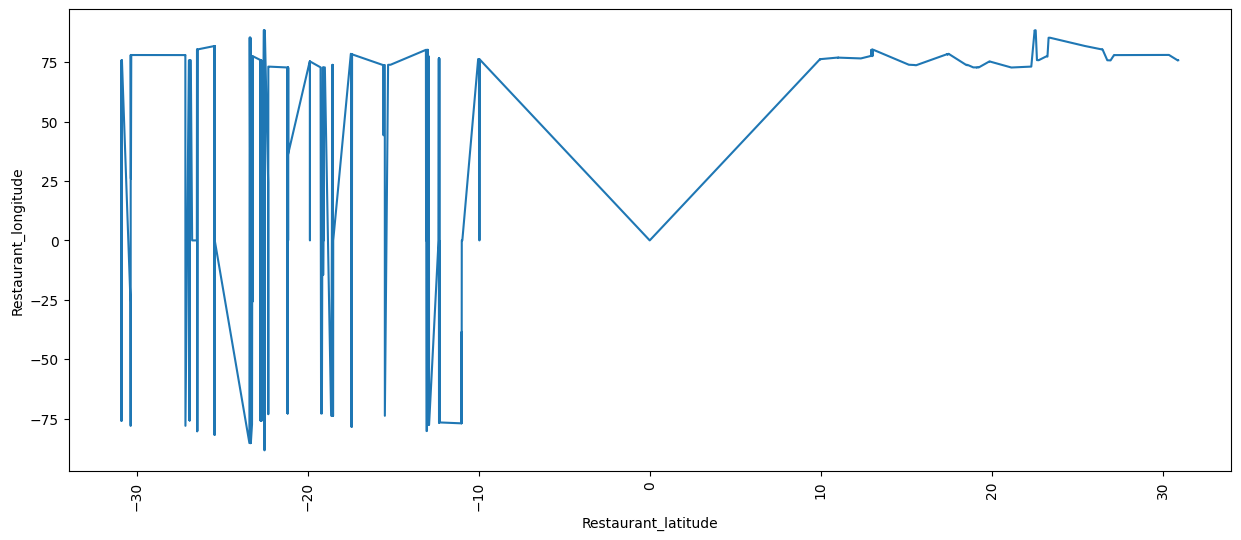

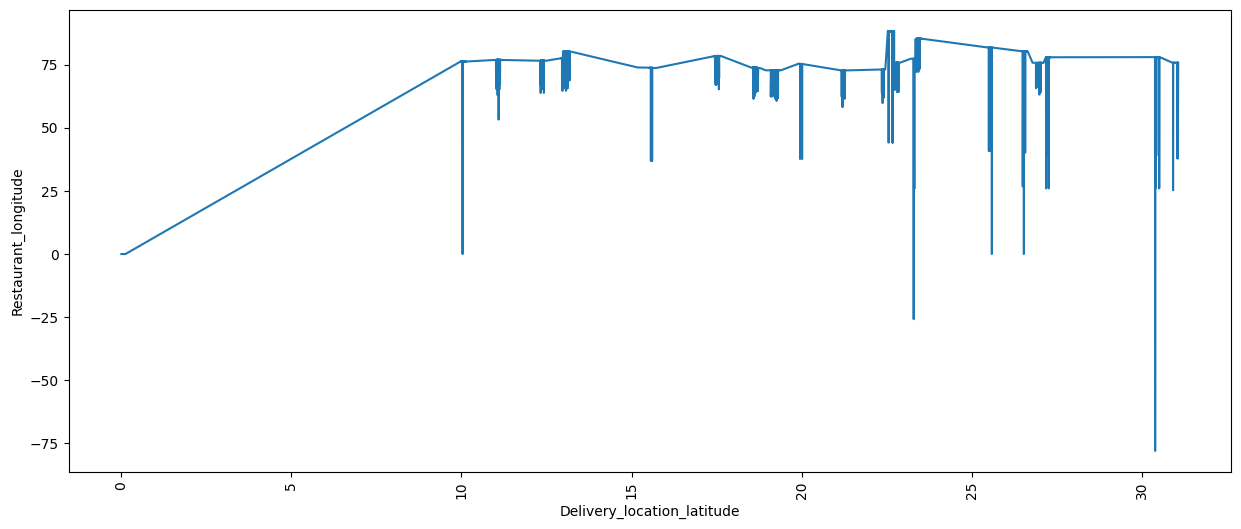

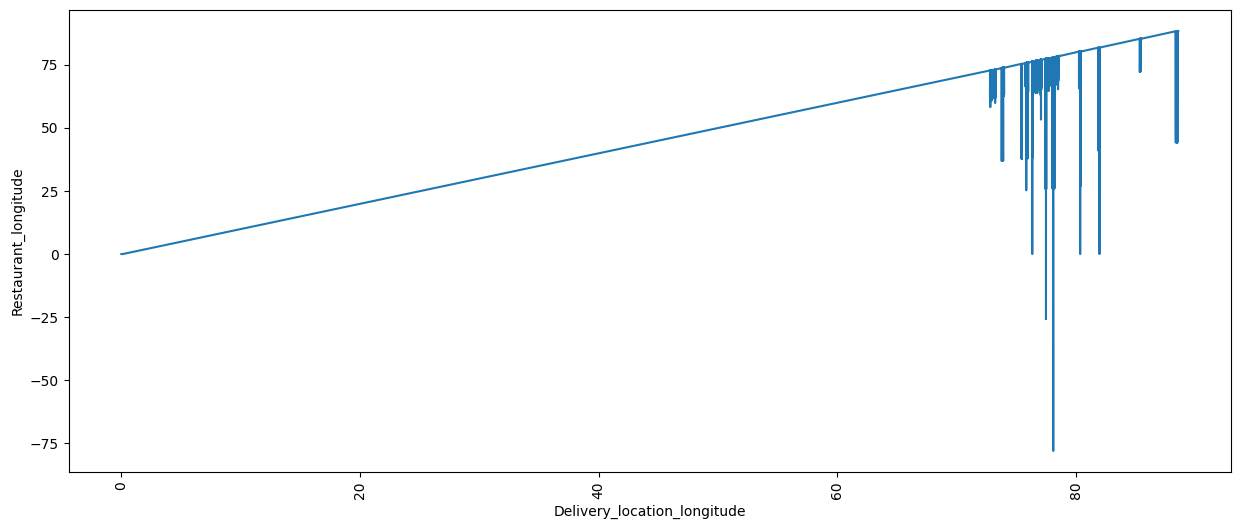

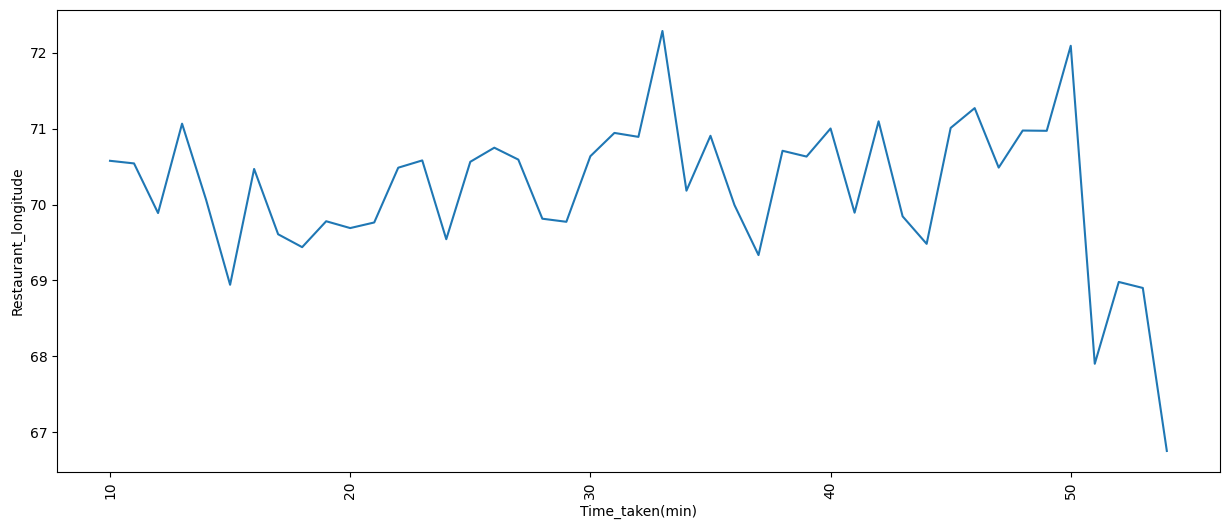

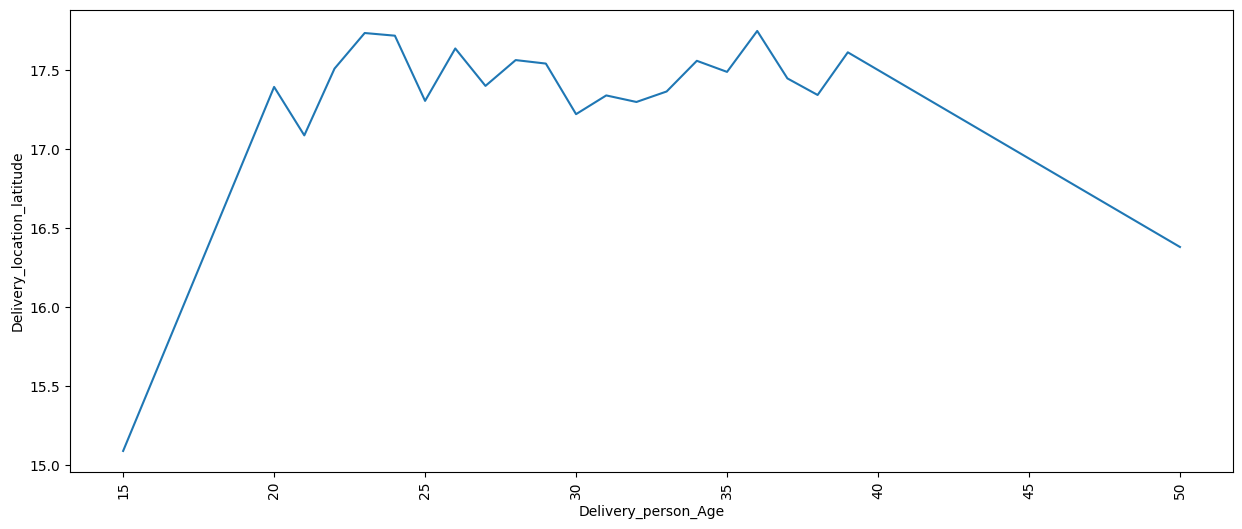

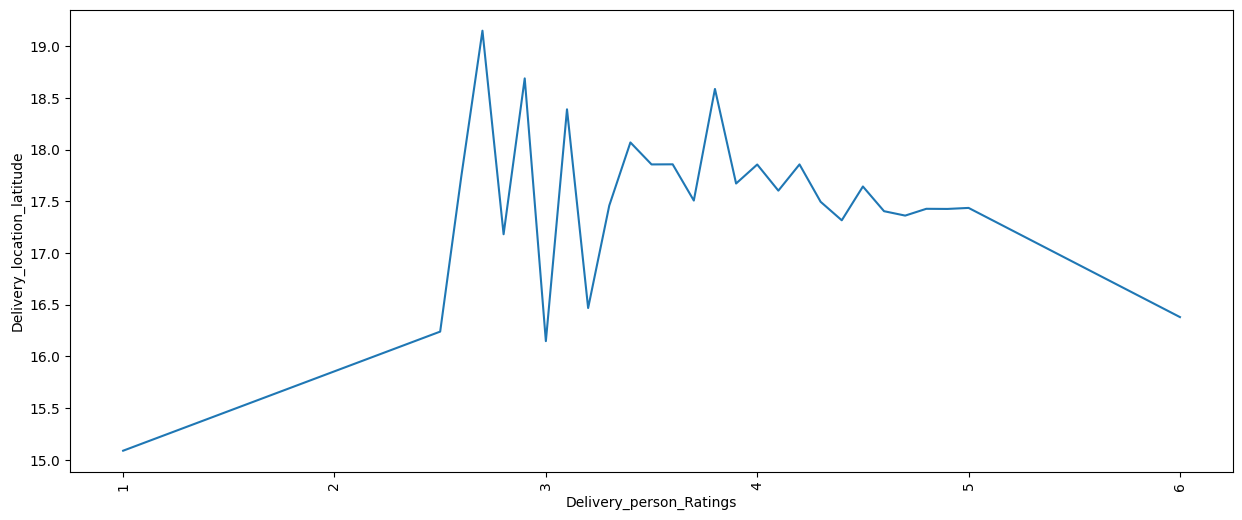

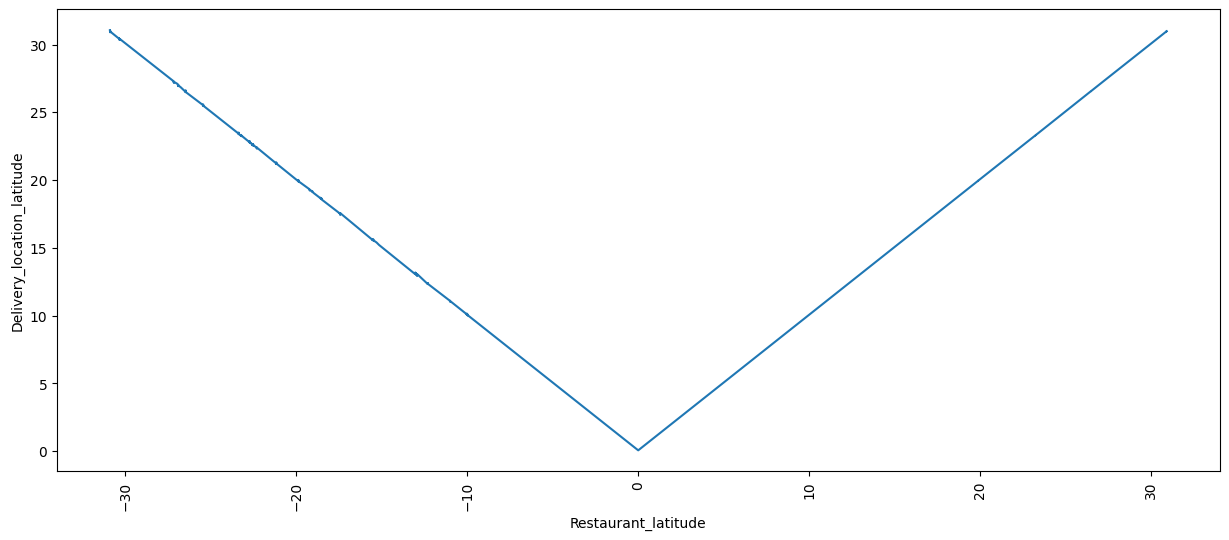

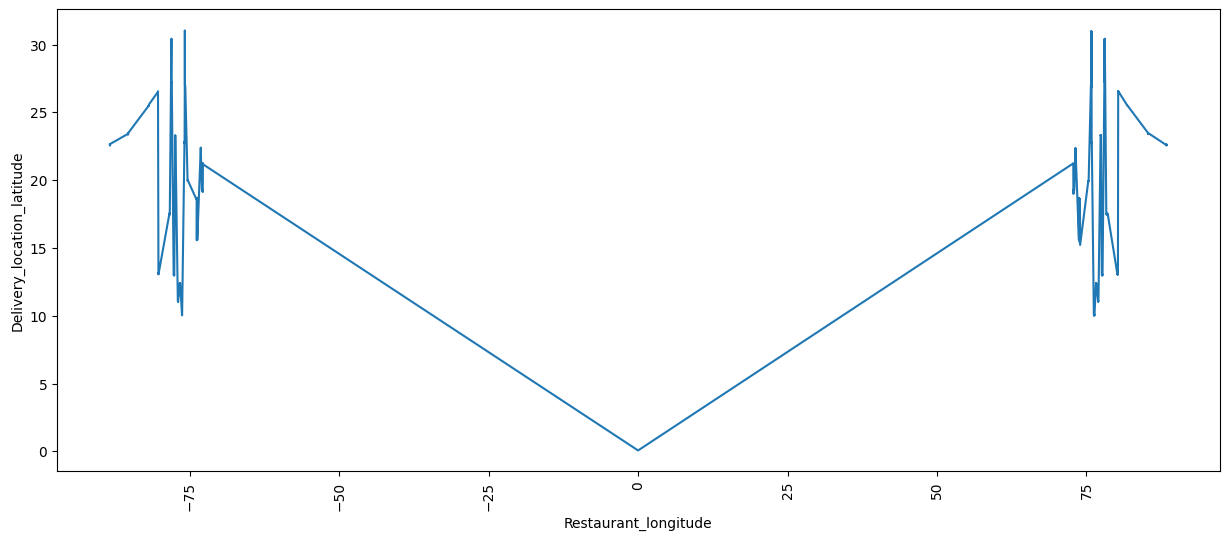

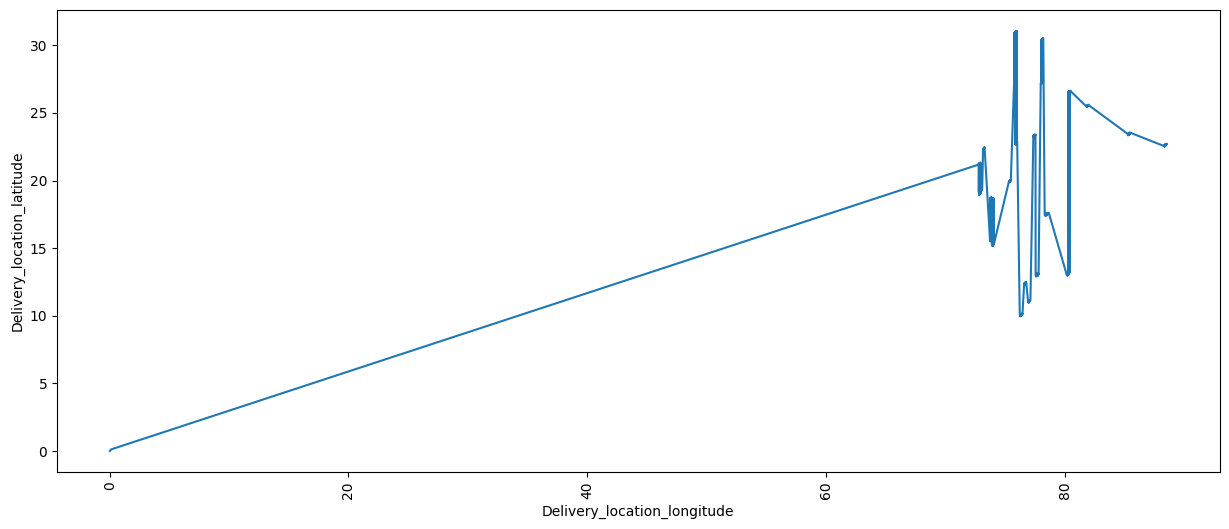

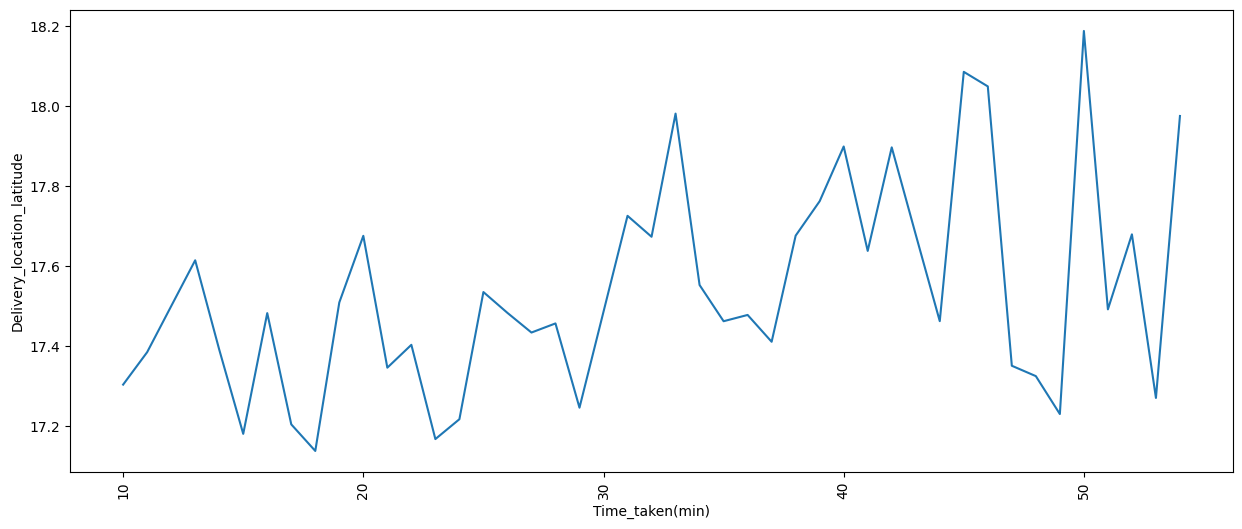

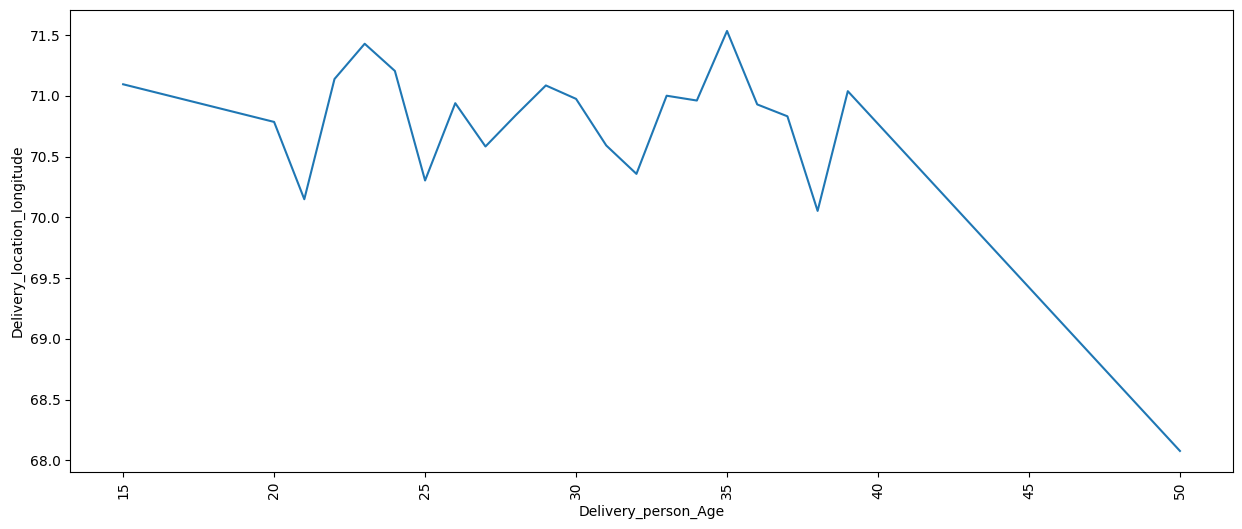

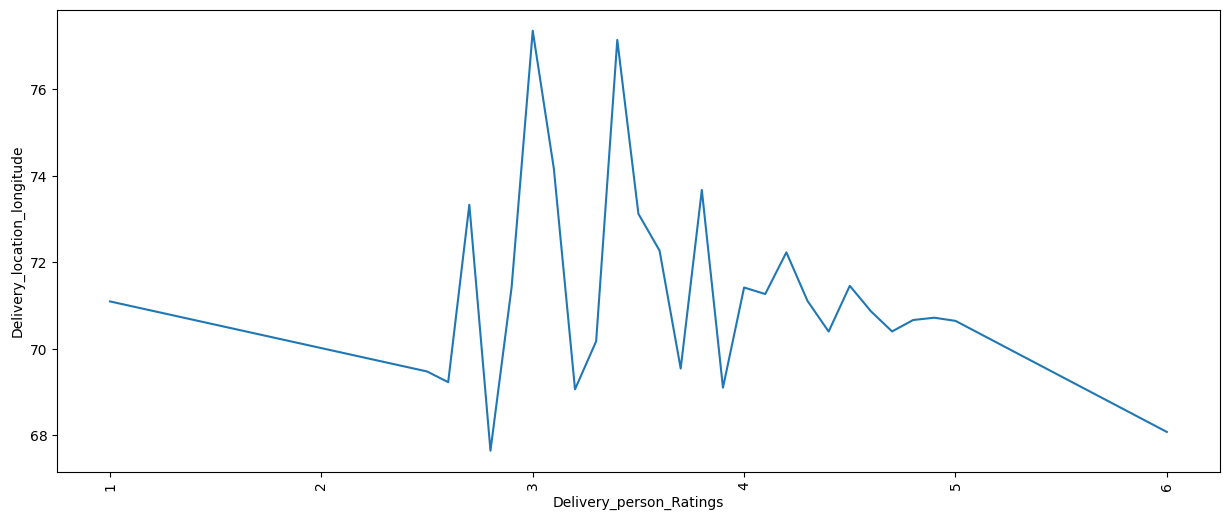

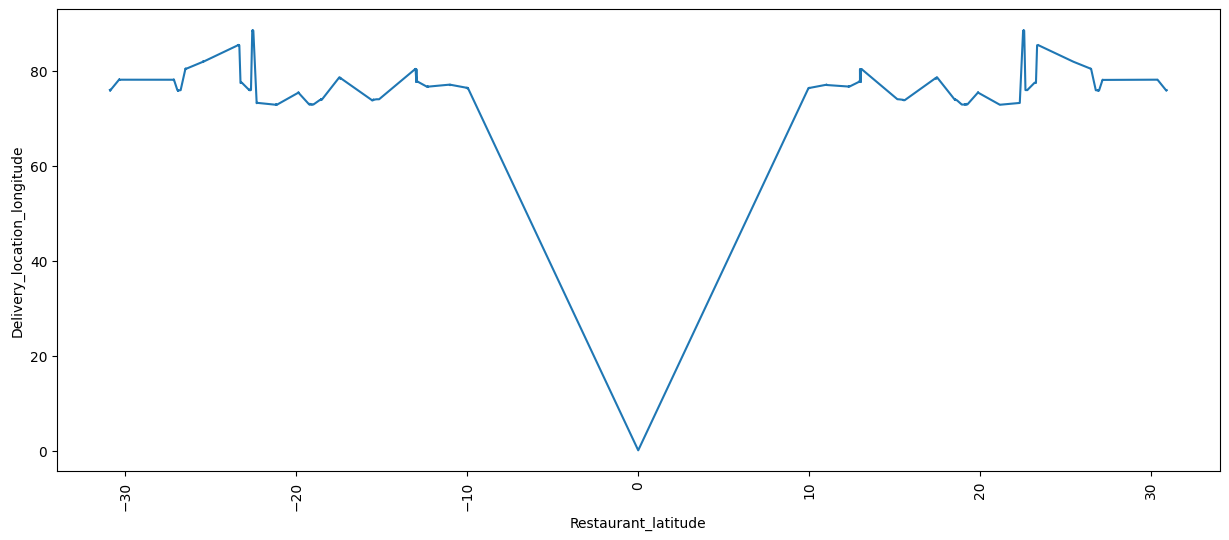

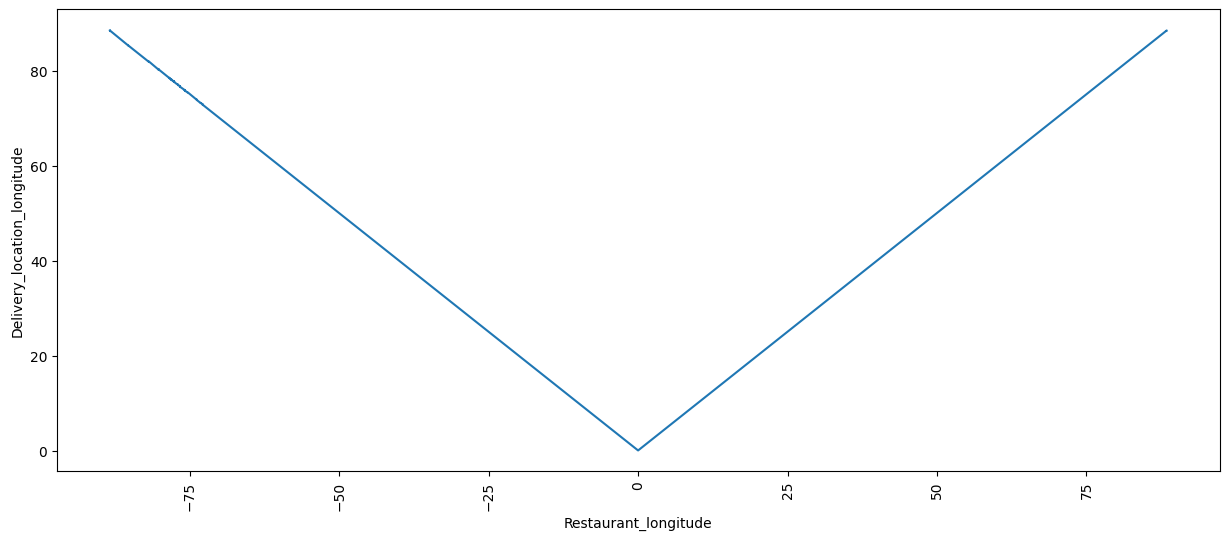

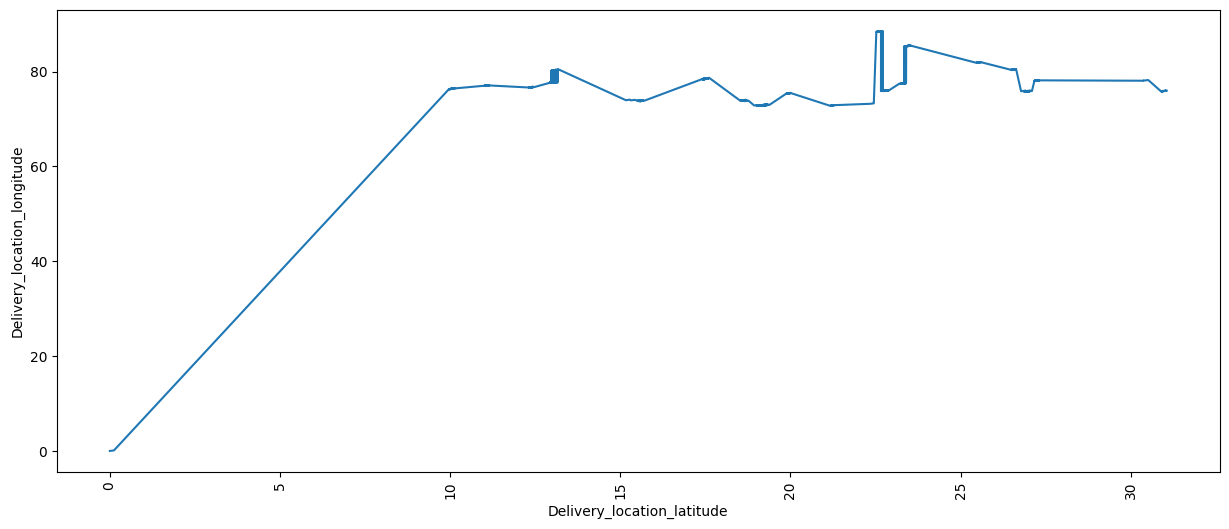

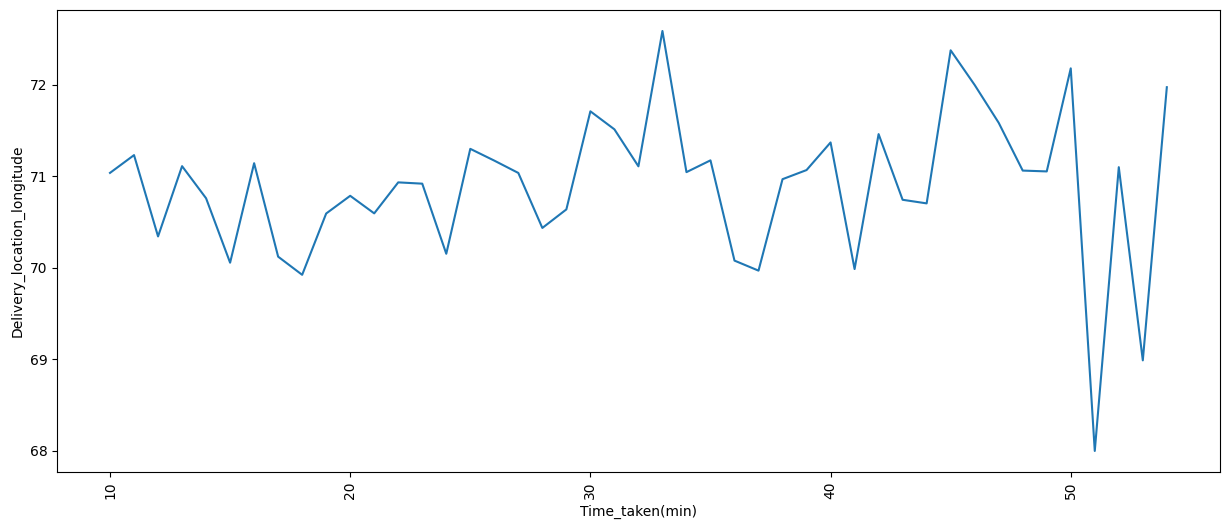

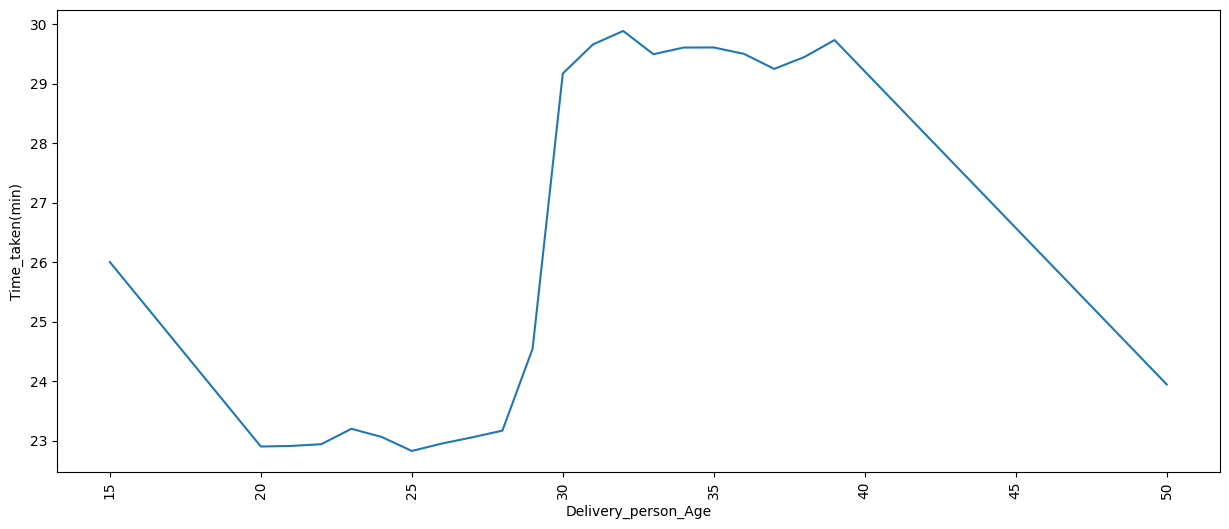

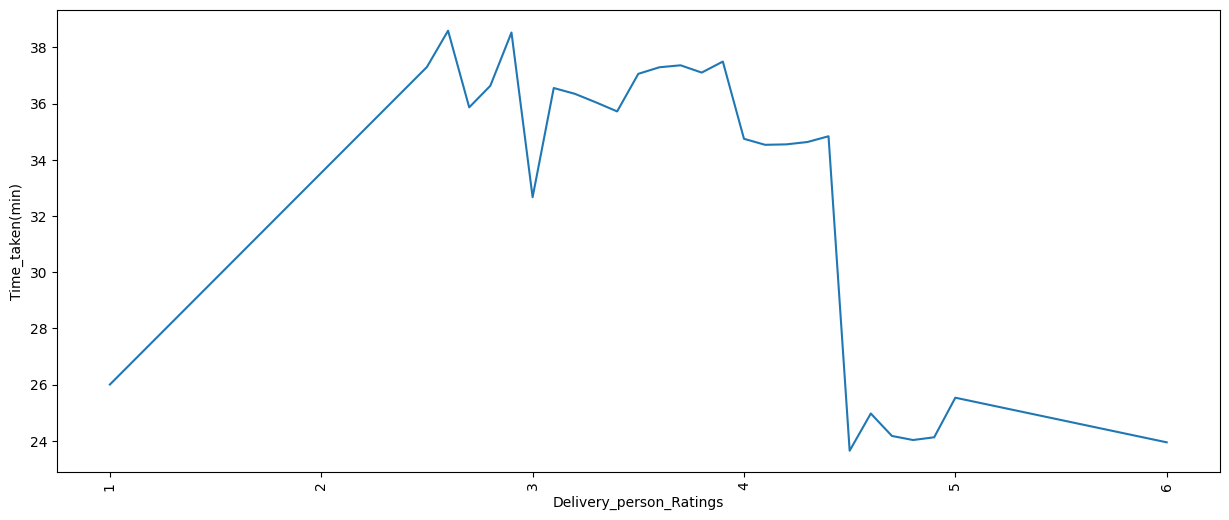

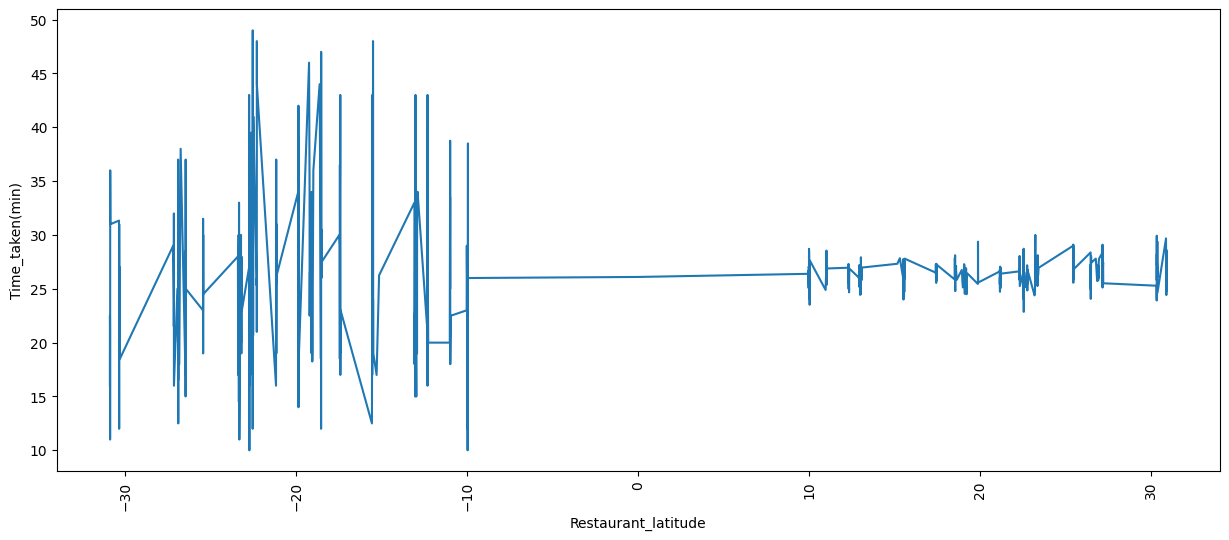

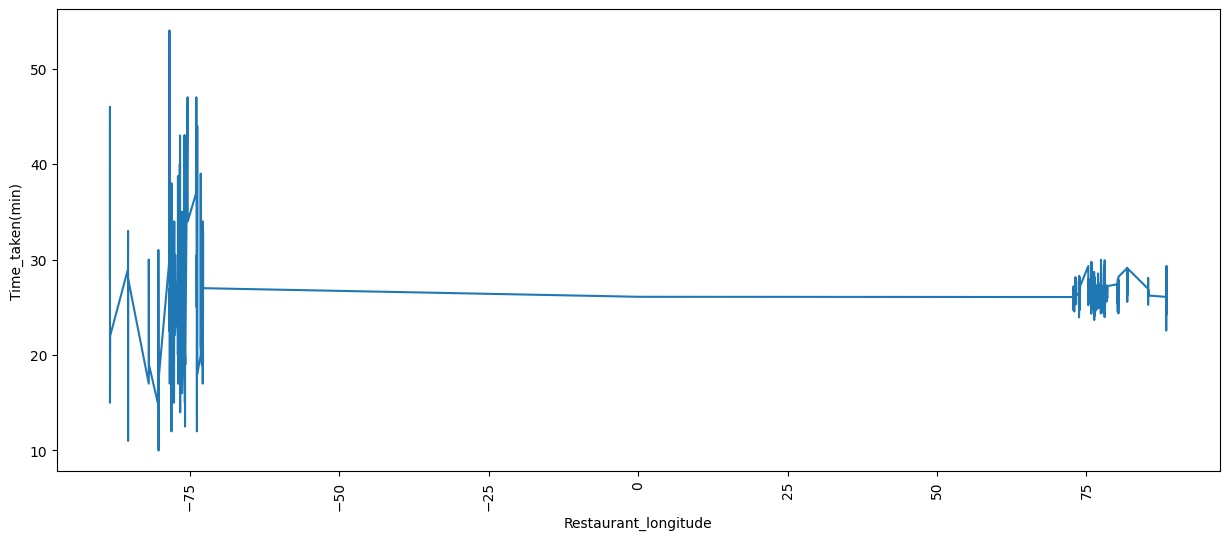

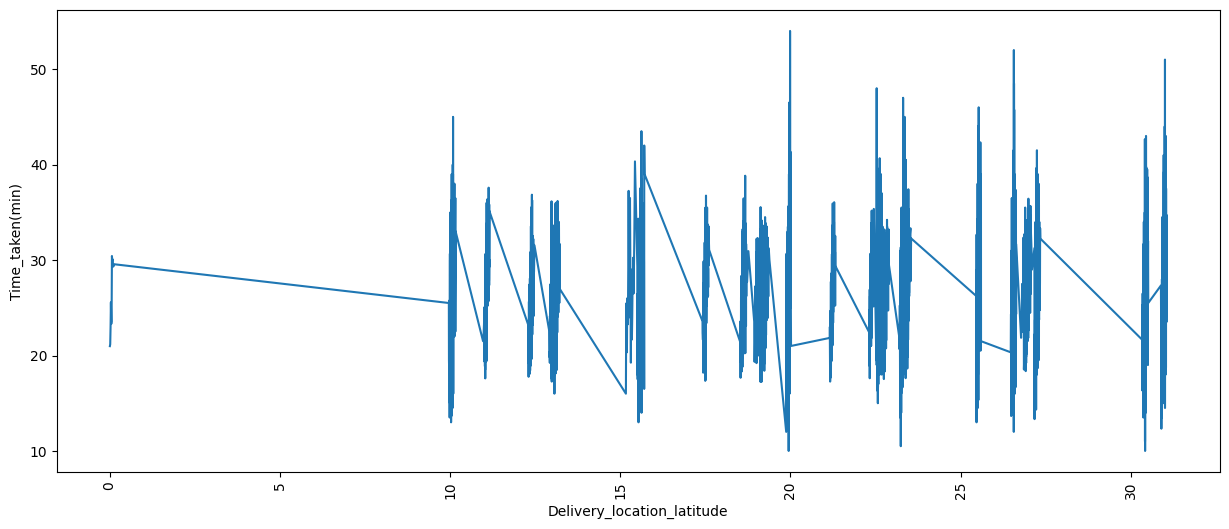

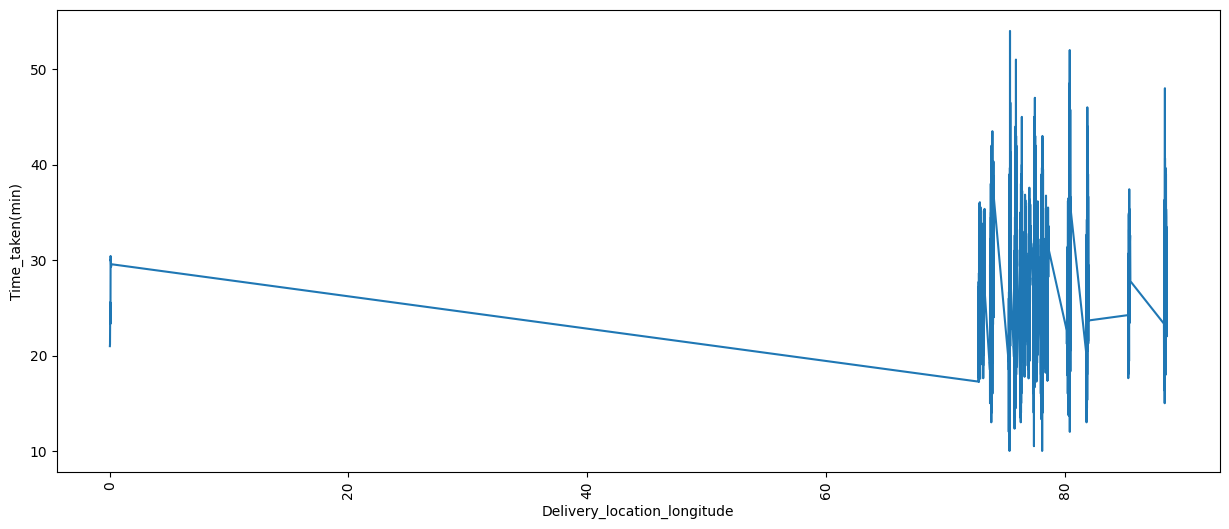

In [ ]:
#Let's see some of the other relationship between the numerical variables
for i in numerical_columns:
  for j in numerical_columns:
    if i != j:
      plt.figure(figsize=(15, 6))
      sns.lineplot(x = data[j], y = data[i], ci = None, palette='hls')
      plt.xticks(rotation = 90)
      plt.show()

In [ ]:
#Finding the correlation between the variables
data_corr = data.corr()
data_corr

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
Delivery_person_Age,1.000000,-0.067482,-0.001908,-0.006790,0.002410,-0.000587,0.292609
Delivery_person_Ratings,-0.067482,1.000000,-0.004847,-0.011141,-0.010200,-0.013344,-0.331182
Restaurant_latitude,-0.001908,-0.004847,1.000000,0.661851,0.866356,0.602775,0.014072
Restaurant_longitude,-0.006790,-0.011141,0.661851,1.000000,0.632376,0.915023,0.007840
Delivery_location_latitude,0.002410,-0.010200,0.866356,0.632376,1.000000,0.690604,0.014341
Delivery_location_longitude,-0.000587,-0.013344,0.602775,0.915023,0.690604,1.000000,0.007643
Time_taken(min),0.292609,-0.331182,0.014072,0.007840,0.014341,0.007643,1.000000


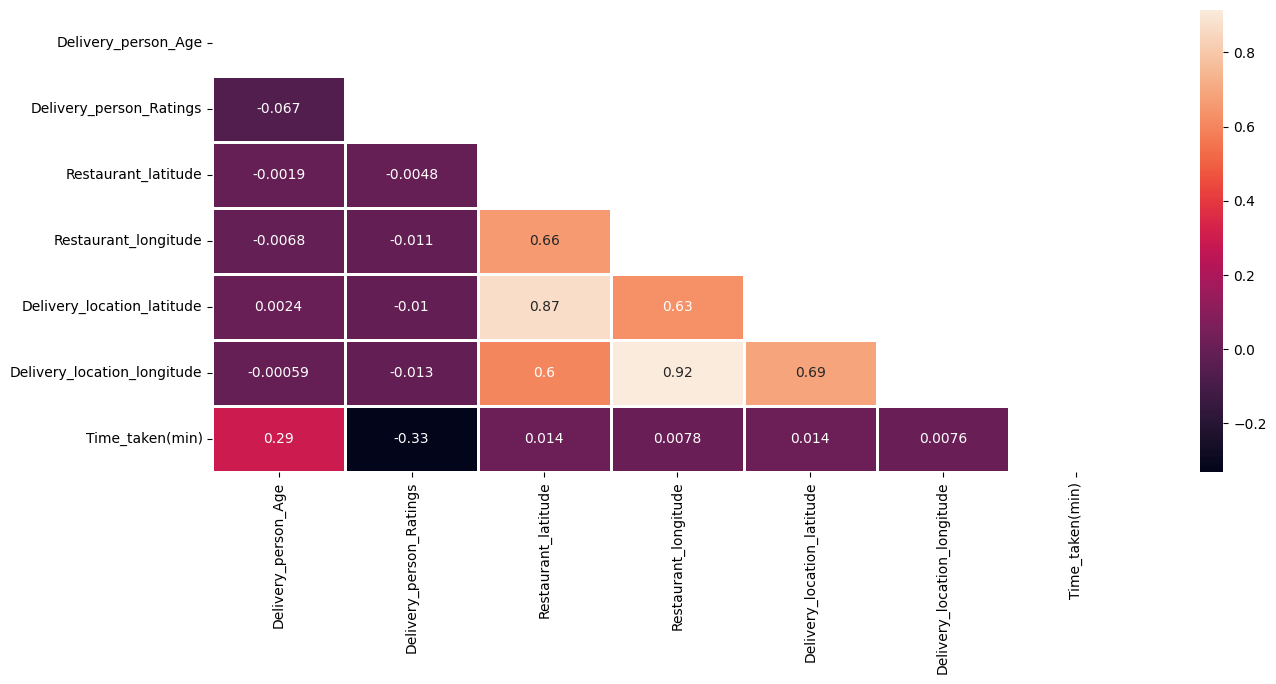

In [ ]:
from numpy.matrixlib.defmatrix import matrix
# Draw the heat map of the correlation of the variable
plt.figure(figsize=(15, 6))
matrix = np.triu(data_corr)
sns.heatmap(data_corr, annot=True, linewidths=.8, mask=matrix, cmap="rocket")
plt.show()

In [ ]:
#Extracting Time Components
data['hour_of_day'] = pd.to_datetime(data['Time_taken(min)'], unit='m').dt.hour
data['hour_of_week'] = pd.to_datetime(data['Time_taken(min)'], unit='m').dt.dayofweek
data['hour_of_year'] = pd.to_datetime(data['Time_taken(min)'], unit='m').dt.month

In [ ]:
import math

In [ ]:
# Function to calculate distance between two sets of latitude and longitude coordinates
def calculate_distance(lat1, lon1, lat2, lon2):
  R = 6371   # Earth's radius in kilometers

  # Convert latitude and longitude from degrees to radians
  lat1_rad = math.radians(lat1)
  lon1_rad = math.radians(lon1)
  lat2_rad = math.radians(lat2)
  lon2_rad = math.radians(lon2)

  # Haversine formula to calculate distance
  dlat = lat2_rad - lat1_rad
  dlon = lon2_rad - lon1_rad
  a = math.sin(dlat/2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2) ** 2
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
  distance = R * c

  return distance

In [ ]:
# Calculate distance and create the distance feature
data['distance'] = data.apply(lambda row: calculate_distance(row['Restaurant_latitude'], row['Restaurant_longitude'],
                                                             row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

print(data['distance'])

ID
4607     3.025149
B379    20.183530
5D6D     1.552758
7A6A     7.790401
70A2     6.210138
          ...    
7C09     1.489846
D641    11.007735
4F8D     4.657195
5EEE     6.232393
5FB2    12.074396
Name: distance, Length: 45581, dtype: float64


In [ ]:
# Categorizing Age data set
age_bins = [0, 30, 50, float('inf')]
age_labels = ['young', 'middle-aged', 'senior']
data['age_category'] = pd.cut(data['Delivery_person_Age'], bins=age_bins, labels=age_labels)

In [ ]:
# Aggregating Ratings
data['avg_ratings'] = data.groupby('Delivery_person_ID')['Delivery_person_Ratings'].transform('mean')

In [ ]:
# Binary Encoding
data = pd.get_dummies(data, columns=['Type_of_order', 'Type_of_vehicle'])

In [ ]:
# Interaction Feature
data['time_ratings_interaction'] = data['Time_taken(min)'] * data['Delivery_person_Ratings']

In [ ]:
data

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),hour_of_day,hour_of_week,...,avg_ratings,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,time_ratings_interaction
ID,,,,,,,,,,,,,,,,,,,,,
4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,24,0,3,...,4.604839,0,0,0,1,0,0,1,0,117.6
B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,33,0,3,...,4.653571,0,0,0,1,0,0,0,1,148.5
5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,26,0,3,...,4.698182,0,1,0,0,0,0,1,0,114.4
7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,21,0,3,...,4.593443,1,0,0,0,0,0,1,0,98.7
70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,30,0,3,...,4.675439,0,0,0,1,0,0,0,1,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,32,0,3,...,4.668333,0,0,1,0,0,0,1,0,153.6
D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,36,0,3,...,4.592308,1,0,0,0,0,0,1,0,165.6
4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,16,0,3,...,4.670455,0,1,0,0,0,0,0,1,78.4


In [ ]:
# Remove 'ID' column as index columns
data.reset_index(inplace=True)

In [ ]:
# Drop the columns that are not going to used for the ML used
columns_to_drop = ['ID', 'Delivery_person_ID', 'Restaurant_latitude', 'Restaurant_longitude',
                   'Delivery_location_latitude', 'Delivery_location_longitude']

In [ ]:
# Drop the columns from the dataset
data = data.drop(columns=columns_to_drop)

In [ ]:
data

,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),hour_of_day,hour_of_week,hour_of_year,distance,age_category,avg_ratings,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,time_ratings_interaction
0,37,4.9,24,0,3,1,3.025149,middle-aged,4.604839,0,0,0,1,0,0,1,0,117.6
1,34,4.5,33,0,3,1,20.183530,middle-aged,4.653571,0,0,0,1,0,0,0,1,148.5
2,23,4.4,26,0,3,1,1.552758,young,4.698182,0,1,0,0,0,0,1,0,114.4
3,38,4.7,21,0,3,1,7.790401,middle-aged,4.593443,1,0,0,0,0,0,1,0,98.7
4,32,4.6,30,0,3,1,6.210138,middle-aged,4.675439,0,0,0,1,0,0,0,1,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45576,30,4.8,32,0,3,1,1.489846,young,4.668333,0,0,1,0,0,0,1,0,153.6
45577,21,4.6,36,0,3,1,11.007735,young,4.592308,1,0,0,0,0,0,1,0,165.6
45578,30,4.9,16,0,3,1,4.657195,young,4.670455,0,1,0,0,0,0,0,1,78.4
45579,20,4.7,26,0,3,1,6.232393,young,4.612903,0,0,0,1,0,0,1,0,122.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45581 entries, 0 to 45580
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Delivery_person_Age                45581 non-null  int64   
 1   Delivery_person_Ratings            45581 non-null  float64 
 2   Time_taken(min)                    45581 non-null  int64   
 3   hour_of_day                        45581 non-null  int64   
 4   hour_of_week                       45581 non-null  int64   
 5   hour_of_year                       45581 non-null  int64   
 6   distance                           45581 non-null  float64 
 7   age_category                       45581 non-null  category
 8   avg_ratings                        45581 non-null  float64 
 9   Type_of_order_Buffet               45581 non-null  uint8   
 10  Type_of_order_Drinks               45581 non-null  uint8   
 11  Type_of_order_Meal                 45581 

In [ ]:
data.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_taken(min)',
       'hour_of_day', 'hour_of_week', 'hour_of_year', 'distance',
       'age_category', 'avg_ratings', 'Type_of_order_Buffet ',
       'Type_of_order_Drinks ', 'Type_of_order_Meal ', 'Type_of_order_Snack ',
       'Type_of_vehicle_bicycle ', 'Type_of_vehicle_electric_scooter ',
       'Type_of_vehicle_motorcycle ', 'Type_of_vehicle_scooter ',
       'time_ratings_interaction'],
      dtype='object')

In [ ]:
# Import some of import library for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Group the data set into target and feature varibables
features_to_scale = ['Delivery_person_Age', 'Delivery_person_Ratings', 'time_ratings_interaction']
features_not_to_scale = ['Time_taken(min)', 'hour_of_day', 'distance',
                         'age_category', 'avg_ratings', 'Type_of_order_Buffet ', 'Type_of_order_Drinks ',
                         'Type_of_order_Meal ', 'Type_of_order_Snack ', 'Type_of_vehicle_bicycle ',
                         'Type_of_vehicle_electric_scooter ', 'Type_of_vehicle_motorcycle ',
                         'Type_of_vehicle_scooter ']
target = 'Time_taken(min)'

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data[features_to_scale + features_not_to_scale], data[target], test_size=0.25, random_state=42)

In [ ]:
# Perform feature scaling for the appropriate features
scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled[features_to_scale] = scaler.fit_transform(x_train_scaled[features_to_scale])
x_test_scaled[features_to_scale] = scaler.transform(x_test_scaled[features_to_scale])

In [ ]:
# Performing one-hot encoding for the 'age_category' feature
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), ['age_category'])], remainder='passthrough')

x_train_scaled = ct.fit_transform(x_train_scaled)
x_test_scaled = ct.transform(x_test_scaled)

### Model-1: Linear Regression

In [ ]:
model_lr = LinearRegression()
model_lr.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make prediction on the test data set
y_pred = model_lr.predict(x_test_scaled)

In [ ]:
#Evaluate the model using root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 1.5209192835608237e-14


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Calculate R-squared score
r2_lr = r2_score(y_test, y_pred)
print('R-squared Score:', r2_lr)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

R-squared Score: 1.0
Mean Squared Error: 2.313195467107169e-28


### Model_2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [ ]:
# Create and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(x_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions on the test set using Decision Tree Regressor
y_pred_dt = dt_regressor.predict(x_test_scaled)

In [ ]:
# Calculate R-squared score for Decision Tree Regressor
r2_dt = r2_score(y_test, y_pred_dt)
print('Decision Tree Regressor - R-squared score:', r2_dt)

Decision Tree Regressor - R-squared score: 1.0


In [ ]:
# Calculate Mean Squared Error (MSE) for Decision Tree Regressor
mse_dt = mean_squared_error(y_test, y_pred_dt)
print('Decision Tree Regressor - Mean Squared Error:', mse_dt)

Decision Tree Regressor - Mean Squared Error: 0.0


In [ ]:
# Create and train the XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=42)
xgb_regressor.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
# Make predictions on the test set using XGBoost Regressor
y_pred_xgb = xgb_regressor.predict(x_test_scaled)


In [ ]:
# Calculate R-squared score for XGBoost Regressor
r2_xgb = r2_score(y_test, y_pred_xgb)
print('XGBoost Regressor - R-squared Score:', r2_xgb)

# Calculate Mean Squared Error (MSE) for XGBoost Regressor
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print('XGBoost Regressor - Mean Squared Error:', mse_xgb)

XGBoost Regressor - R-squared Score: 0.9999999999926376
XGBoost Regressor - Mean Squared Error: 6.358150884226078e-10
